In [639]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import re
from konlpy.tag import *

m = Mecab(dicpath = 'C:/mecab/mecab-ko-dic')

In [640]:
m.pos('닥스훈트')

[('닥스훈트', 'NNG')]

### Product Review의 토큰화

In [641]:
product = pd.read_csv("C:/Users/shopperhouse/Code/GEN_Ailee/product_travel-adaptor_2.csv", index_col = 0)
product.reset_index(drop = True)

,add_rule_based_split_review
0,유럽용은 안 써도 될 듯 ㅠ
1,금액 차이 얼마 안 나는데 기능은 더 좋아요
2,콤팩트한 디자인과 실용성에 높은 점수 주었습니다
3,전면 스크래치가 많아서 아쉽네요
4,미국 기서 사용했어요
...,...
5702,미국 가는 친구한테 선물로 보내줬는데 유용한 거 같아요
5703,가볍고 휴대하기 좋아요
5704,요 사이즈가 딱이네요
5705,켔써요 노란색이 너무 귀엽군요


In [642]:
# from konlpy.tag import Mecab

# m = Mecab(dicpath = 'C:/mecab/mecab-ko-dic')
# m.nouns('A타입도 좋고, PD충전 되는 것도 좋아요. C타입까지 여러개 있어서 좋습니다, 110V, USB랑 하나로 가성비 좋음 내구성도 ㅇㅋㅇㅋ, 고데기')

In [643]:
def replace_text(text):
  text = str(text)

  text = text.replace('사요', '사용')
  text = text.replace('질', '잘')
  text = text.replace('요고', '이거')
  text = text.replace('USB 타입', 'USB타입')
  text = text.replace('색', '색상')
  text = text.replace('색감', '색상')
  text = text.replace('색깔', '색상')

  text = text.replace('노견', '노령견')
  text = text.replace('아가', '아기')

  text = text.replace('먼지 통제 거할 때','먼지통 제거 할 때')
  text = text.replace('흡입 능력','흡입능력')
  text = text.replace('시스탬','시스템')
  text = text.replace('선책','선택')
  text = text.replace('사셈','사세요')
  text = text.replace('워터 루핀','워터루핀')
  text = text.replace('상풍','상품')
  text = text.replace('청소 기밀','청소기 밀')
  text = text.replace('청소 기밀기','청소기 밀기')
  text = text.replace('진 작살','진작 살 ')
  text = text.replace('먼지 통안','먼지통 안')
  text = text.replace('먼 지통','먼지통')
  text = text.replace('먼지 통','먼지통')
  text = text.replace('해르','헤드')
  text = text.replace('가법고','가볍고')
  text = text.replace('삼실','사무실')
  text = text.replace('화이트로','화이트')
  text = text.replace('마니','많이')
  text = text.replace('기욤','귀여움')
  text = text.replace('소제','소재')
  text = text.replace('아소변워요','아쉬워요')
  text = text.replace('아소변우나','아쉬우나')
  text = text.replace('보 풀제 거기','보풀제거기')
  text = text.replace('강화 마루','강화마루')
  text = text.replace('청소 기안에','청소기 안에')
  text = text.replace('흠이 버력','흡입력')
  text = text.replace('누름','누르는')
  text = text.replace('청소역','청소력')
  text = text.replace('채상','책상')
  text = text.replace('청소용임','청소용')
  text = text.replace('가 벼 워서','가벼워서')
  text = text.replace('착지만','작지만')
  text = text.replace('강학요','강해요')
  text = text.replace('머리 타락','머리카락')
  text = text.replace('소올찍히','솔직히')
  text = text.replace('가분','기분')
  text = text.replace('착 아도','작아도')
  text = text.replace('늪이','높이')
  text = text.replace('헤어 두레기','헤어드라이기')
  text = text.replace('앙고','않고')
  text = text.replace('자사소형핸ㄷㄱ청소기','자사 소형 핸드청소기')
  text = text.replace('흡립','흡입')
  text = text.replace('구래도','그래도')
  text = text.replace('정소','청소')
  text = text.replace('최인','최신')
  text = text.replace('작은걸찾았늣데','작은 걸 찾았는데')
  text = text.replace('조그 마한','조그마한')
  text = text.replace('과대광 고언 것 같아요','과대광고 인 것 같아요')
  text = text.replace('반려 묘도','반려묘도')
  text = text.replace('탁입니다','딱입니다')
  text = text.replace('필라 센터','필라테스 센터')
  text = text.replace('주목적','목적')
  text = text.replace('총후 기','청소기')
  text = text.replace('좋진요','좋아요')
  text = text.replace('한보 따립니다','한보따리 입니다')
  text = text.replace('공력','진공력')
  text = text.replace('탈 거 착임','탈거착이')
  text = text.replace('문특','문틀')
  text = text.replace('어주','아주')
  text = text.replace('스투디오','스튜디오')
  text = text.replace('색원','색감')
  text = text.replace('행보해요','행복해요')
  text = text.replace('뒤 덮인','뒤덮인')
  text = text.replace('뎔심','결심')
  text = text.replace('순각','순간')
  text = text.replace('공홈','공식 홈페이지')
  text = text.replace('배턴','배터리')
  text = text.replace('ㅊ','후 차')
  text = text.replace('대파 이프','대 파이프')
  text = text.replace('위봉','위 봉')
  text = text.replace('신준','사준')
  text = text.replace('구서 무석','구석구석')
  text = text.replace('활둉도면','활용도 면')
  text = text.replace('삼성청노기','삼성 청소기')
  text = text.replace('역조','욕조')
  text = text.replace('완저','완전')
  text = text.replace('망어','망이')
  text = text.replace('오자마다','오자마자')
  text = text.replace('안족스럽다네요','만족스럽다네요')
  text = text.replace('장봉익','장봉이')
  text = text.replace('아전','아주')
  text = text.replace('상각','생각')
  text = text.replace('선무','선물')
  text = text.replace('만지','먼지')
  text = text.replace('원하셩거든요','원하셨거든요')
  text = text.replace('싼 마이지만','싼마이지만')
  text = text.replace('긴가 민가','긴가민가')
  text = text.replace('알지게','알차게')
  text = text.replace('흡입려콰','흡입력과 ')
  text = text.replace('자몽할 듯','사용할 듯')
  text = text.replace('정마','정말')
  text = text.replace('가성비 절고','가성비 좋고')
  text = text.replace('뽀송','보송')
  text = text.replace('아음','마음')
  text = text.replace('엄니','어머니')
  text = text.replace('기대 이싱','기대 이상')
  text = text.replace('난립','날림')
  text = text.replace('먼지 날림','먼지날림')
  text = text.replace('파어','파워')
  text = text.replace('소응','소음')
  text = text.replace('가법고','가볍고')
  text = text.replace('너무 귀영 와요','너무 귀여워요')
  text = text.replace('아무래고','아무래도')
  text = text.replace('추전','추천')
  text = text.replace('오시프텔','오피스텔')
  text = text.replace('청소 용구','청소용품')
  text = text.replace('핵 좋음','정말 좋음')
  text = text.replace('엘사','LG')
  text = text.replace('봏았습니다','좋았습니다')
  text = text.replace('청소가 소변워요','청소가 쉬웠어요')
  text = text.replace('총 소포','청사포')
  text = text.replace('탑 오브 탑','탑오브탑')
  text = text.replace('마논','만원')
  text = text.replace('천소','청소')
  text = text.replace('훵씬','훨씬')
  text = text.replace('소변워요','쉬웠어요')
  text = text.replace('스턴딩','스탠딩')
  text = text.replace('그으긋','굿')
  text = text.replace('흡인력','흡입력')
  text = text.replace('휴 지통','휴지통')
  text = text.replace('휴지 통','휴지통')

  text = text.replace('메디 힐먼','메디힐먼')
  text = text.replace('최구','최고')
  text = text.replace('마디 힐','메디힐')
  text = text.replace('똥 손','똥손')
  text = text.replace('더마 픽스','더마픽스')
  text = text.replace('앰풀','앰플')
  text = text.replace('리들 샷','리들샷')
  text = text.replace('머디 힐','메디힐')
  text = text.replace('충실다','충실')
  text = text.replace('화큰거림','화끈거림')
  text = text.replace('따끔 거림','따끔거림')
  text = text.replace('엄첟','엄청')
  text = text.replace('호과','효과')
  text = text.replace('잔느 식스 헬로 케어 팩','잔느식스헬로케어팩')
  text = text.replace('쟁여 노코','쟁여놓고')
  text = text.replace('뒤끔 찌','뒤끔치')
  text = text.replace('미 백수 분','미백 수분')
  text = text.replace('베슷흐','베스트')
  text = text.replace('넉 넛','넉넉')
  text = text.replace('넛어두','넣어두고')
  text = text.replace('메딜힐','메디힐')
  text = text.replace('지대로','제대로')
  text = text.replace('최애 텀','최애탬')
  text = text.replace('깜ㄴ장색','검정색')
  text = text.replace('히알루론','히알루로닉')
  text = text.replace('효고ㅏ','효과')
  text = text.replace('효고','효과')
  text = text.replace('앰프','앰플')
  text = text.replace('아이 패치','아이패치')
  text = text.replace('붇','붙')
  text = text.replace('피분','피부')
  text = text.replace('순수 크린','순수크린')
  text = text.replace('흘러 내림','흘러내림')
  text = text.replace('닥터 웰메이드','닥터웰메이드')
  text = text.replace('서우 콜라겐','서우콜라겐')
  text = text.replace('피르 이즘','피르이즘')
  text = text.replace('피르 가즘','피르이즘')
  text = text.replace('일 인일 팩','일인일팩')
  text = text.replace('진덕','진득')
  text = text.replace('스마트 스토어','스마트스토어')
  text = text.replace('골드 핏 마스크','골드핏마스크')
  text = text.replace('매디 힐리','메디힐')
  text = text.replace('좋아 거 같아요',' 좋은 것 같아요')
  text = text.replace('1일 1팩','일인일팩')
  text = text.replace('패기','팩이')
  text = text.replace('그린 토마토','그린토마토')
  text = text.replace('핑크 콜라겐','핑크콜라겐')
  text = text.replace('피부사','피부가')
  text = text.replace('훠어얼씬','훨씬')
  text = text.replace('GGGOOODDD','굿')
  text = text.replace('개래해패패메이딘에리이데니미에이프','')
  text = text.replace('적당하니갠출하네요','적당하니 괜찮네요')
  text = text.replace('생각의 에로','생각 이외로')
  text = text.replace('조흥','좋음')
  text = text.replace('다조 음','다 좋음')
  text = text.replace('트러볼리','트러블이')
  text = text.replace('조하','좋아')
  text = text.replace('잘 신거','잘 산것')
  text = text.replace('미 백면에','미백 면에')
  text = text.replace('해시네요','하시네요')
  text = text.replace('퍀','팩')
  text = text.replace('고 머','구매')
  text = text.replace('배송잉','배송이')
  text = text.replace('포정','포장')
  text = text.replace('써봏게요','써볼게요')
  text = text.replace('로로 스키니','로로스키니')
  text = text.replace('처촉쓰','촉촉')
  text = text.replace('마스크퍅','마스크팩')
  text = text.replace('두문','주문')
  text = text.replace('다 회차','다회차')
  text = text.replace('내 용품엔','내용품에는')
  text = text.replace('누런색','노란색')
  text = text.replace('만복','만족')
  text = text.replace('후니아거저리디저리이자라라','')
  text = text.replace('에셍스','에센스')
  text = text.replace('도아오','좋아요')
  text = text.replace('마크 스펙','마스크팩')
  text = text.replace('촉촉촉 촉촉해요','촉촉해요')
  text = text.replace('촉촉촉 너무 촉촉해요','촉촉해요')
  text = text.replace('대 요량','대용량')
  text = text.replace('뒤꿈 찌','뒤꿈치')
  text = text.replace('좀따끔하지먀미백됩니다','좀 따끔하지만 미백됩니다')
  text = text.replace('무착','무척')
  text = text.replace('업고','없고')
  text = text.replace('달팽이 팩','달팽이팩')
  text = text.replace('두름','주름')
  text = text.replace('즛 보여요','듯 보여요')
  text = text.replace('시웡해서','시원해서')
  text = text.replace('허낙ㄱㄴ거내거니러니니','')
  text = text.replace('재서 매는','재구매는')
  text = text.replace('악전 조라','악건조라')
  text = text.replace('조은진','좋은지')

  text = text.replace('Y 라인','Y존')
  text = text.replace('아이존','Y존')
  text = text.replace('와이 존','Y존')
  text = text.replace('와이존','Y존')
  text = text.replace('젝 스미스','잭시믹스')
  text = text.replace('Y 존','Y존')
  text = text.replace('네 링스','레깅스')
  text = text.replace('좋습니 디좋습니 디좋습니 디','')
  text = text.replace('2XL','XXL')
  text = text.replace('3XL', 'XXXL')
  text = text.replace('엑스스몰', 'XS')
  text = text.replace('에스', 'S')
  text = text.replace('미디엄', 'M')
  text = text.replace('라지', 'L')
  text = text.replace('엑스라지', 'XL')
  text = text.replace('투엑스라지', 'XXL')
  text = text.replace('엑스 라지', 'XL')
  text = text.replace('투엑스 라지', 'XXL')
  text = text.replace('쫄바지','레깅스')
  text = text.replace('아시게도','아쉽게도')
  text = text.replace('엉덩일','엉덩이를')
  text = text.replace('44 사이즈','44사이즈')
  text = text.replace('55 사이즈','55사이즈')
  text = text.replace('66 사이즈','66사이즈') 
  text = text.replace('77 사이즈','77사이즈')
  text = text.replace('88 사이즈','88사이즈')
  text = text.replace('44','44사이즈')
  text = text.replace('55','55사이즈')
  text = text.replace('66','66사이즈')
  text = text.replace('6677','66사이즈 77사이즈')
  text = text.replace('면인','면이')
  text = text.replace('바이커 쇼','바이커쇼츠')
  text = text.replace('홈트', '홈트레이닝')
  text = text.replace('히프 업', '힙업')
  text = text.replace('히프', '힙')
  text = text.replace('아소변움', '아쉬움')
  text = text.replace('아소변운', '아쉬운')
  text = text.replace('구슥슥슥슥슥슥슥슥슥', '')
  text = text.replace('하비', '하체비만')
  text = text.replace('FREE 사이즈', '프리사이즈')
  text = text.replace('읎음', '없음')
  text = text.replace('고퀄', '고퀄리티')
  text = text.replace('필라', '필라테스')

  return text

In [644]:
product['add_rule_based_split_review'] = product['add_rule_based_split_review'].apply(replace_text)

In [645]:
# def compiled_morphs(texts, stopwords_path, additional_stopwords=[]):
#     # 불용어 파일 로드
#     with open(stopwords_path, encoding='utf-8') as file:
#         stopwords = file.read().splitlines()
    
#     # 추가 불용어 합치기
#     stopwords.extend(additional_stopwords)
    
#     # 리뷰 전처리
#     clean = re.sub(r'[-=+,#/\?:^$.@*"※~&%ㆍ!』\\‘·|\(\)\[\]\<\>`\'…\"\“’]', '', texts)
#     clean = clean.replace('\n','').replace('\r','')     # 줄바꿈 문자 제거
    
#     # 형태소 분석기 추가
#     m = Mecab(dicpath='C:/mecab/mecab-ko-dic')
    
#     result = []
#     for i in range(len(m.pos(clean))):
#         word, pos = m.pos(clean)[i]
    
#         # 형태소가 연결 어미인지 확인
#         if pos in ['VA']:
#             if i + 1 < len(m.pos(clean)):
#                 next_word, next_pos = m.pos(clean)[i + 1]
#                 if next_pos in ['EC', 'ETM']:           # 연결 어미 또는 관형형 전성 어미
#                     result.append(word + next_word)
#                 else:
#                     result.append(word)
#         elif pos in ['NNG', 'NNP']:
#             result.append(word)
    
#     # 불용어 처리
#     results = [word for word in result if word not in stopwords]
#     return results

In [646]:
def compiled_nouns(texts, stopwords_path, additional_stopwords=[]):
    # 불용어 파일 로드
    with open(stopwords_path, encoding='utf-8') as file:
        stopwords = file.read().splitlines()
    
    # 추가 불용어 합치기
    stopwords.extend(additional_stopwords)
    
    # 리뷰 전처리
    clean = re.sub(r'[-=+,#/\?:^$.@*"※~&%ㆍ!』\\‘·|\(\)\[\]\<\>`\'…\"\“’]', '', texts)
    clean = clean.replace('\n','').replace('\r','')     # 줄바꿈 문자 제거
    
    # 형태소 분석기 추가
    m = Mecab(dicpath='C:/mecab/mecab-ko-dic')
    pos_tags = m.pos(clean)
    for word, pos in pos_tags:
        print(f"Word: {word}, POS: {pos}")

    result = [word for word, pos in pos_tags if pos in ['NNP', 'NNG']]
    
    # 불용어 처리
    results = [word for word in result if word not in stopwords]
    
    return results

In [647]:
# texts = product['add_rule_based_split_review']  # 리뷰 데이터
stopwords_path = "C:/Users/shopperhouse/Downloads/stopwords-ko.txt"
additional_stopwords = ['가', '가격', '가운데', '가족', '간', '감', '감비', '감사', '값', '강추', '같고', '같습니다', '같아', '같아서', '같아요', '겉', '가성비',
                        '같은', '결제', '같은데', '개', '거', '거랑', '걱정', '검색', '것', '겉', '게', '게요', '결과', '결재', '경우', '고', '금액', '차이',
                        '고려', '고만', '고민', '곳', '과', '괜찮아요', '구리고', '구매', '구매평', '구비', '구성', '구입', '군더더기', '굿', '귀찮게',
                        '귀찮고', '글', '급하게', '기대', '기존', '기준', '길', '김기', '깊질', '까지', '끝', '나라', '나중', '날', '남편',
                        '냐짱', '너무', '네이버', '노브', '눈', '느낌', '느리네요', '는', '다', '다르게', '다르고', '다양', '다이소', '다행', '달',
                        '담', '답변', '대부분', '대비', '대신', '덕분', '덜렁', '도', '도착', '돈', '동봉', '동생', '동일', '돼다', '되다',
                        '되어다', '두면', '뒤', '들', '등', '디', '딸', '때', '땡', '뛰어나다', '라', '라고', '래빗', '레이', '로', 
                        '를', '리뷰', '마', '마련', '마음', '만', '만족', '많고', '많아서', '많았었', '많지만', '말', '맘', '맛', '멀티',
                        '멜리', '면', '못', '무료', '문', '문제', '물', '물건', '미', '및', '밑', '며칠', '바이', '박스', '반', '받다',
                        '발', '발송', '배', '배송', '번', '번개', '벽', '변', '별도', '별점', '보관', '복', '봉', '부분', '브레',
                        '비선', '비싸지', '비싸지만', '빌', '사나', '사서', '사실', '사요', '사용', '사장', '사진', '생각', '서', '선물', '선택',
                        '설치', '세상', '쇼퍼', '숍', '수', '숙소', '스타', '스티커', '스펙', '시', '시기', '시대', '시험', '식겁', '신랑',
                        '신행', '실사', '실사용자', '싸게', '싸구려', '싸는데', '싸진', '쌀', '써다', '쏙', '쓸모', '아들', '아무것', '아쉽네요', '아쉽습니다',
                        '아주', '아직', '안', '않다', '알차게', '앞', '애', '야지', '얇아요', '얘기', '어렵더라고요', '어머니', '언니', '언스', '엄마',
                        '업', '없겠', '없고', '없나', '없네요', '없는', '없어서', '없어요', '없었', '없으니까요', '없지만', '에', '에서', '엔', '엔코',
                        '여분', '여유', '역할', '연락', '연휴', '옆', '예비', '예전', '옛날', '오다', '오랫동안', '오전', '오케이', '오후',
                        '와', '와이프', '요', '요새', '요즘', '용', '운', '워홀', '원', '원래', '유용', '으로', '은', '을', '의',
                        '이', '이거', '이다', '이라', '이랑', '이번', '이외', '이용', '이유', '이전', '인', '인터넷', '일행', '있고', '있군요',
                        '있긴', '있네요', '있는', '있는대도', '있다', '있다는', '있던데', '있어', '있어서', '있었', '있을', '있지만', '자', '자다', '자체',
                        '잔', '잘', '장만', '잦은데', '저렴', '저번', '전', '전용', '전이', '전체', '점', '정', '정도', '제', '제공',
                        '제품', '종결', '종류', '좋겠', '좋고', '좋네요', '좋더라구요', '좋습니다', '좋아서', '좋아요', '좋았', '좋은', '좋은데요', '좋을', '주', '좋',
                        '주니', '주문', '주파', '준비', '중요', '지난번', '지네', '지원', '지인', '집', '차', '차지', '처리', '처음', '첨부',
                        '추천', '추후', '출국', '출장', '친구', '친절', '커피', '코', '크게', '크지', '큰일', '테스트', '퇴원', '튀', '트',
                        '티', '판매', '편리', '편하게', '편하고', '평', '평생', '포장', '포함', '표', '프리', '필', '필수탬', '필요', '하고', '필수', '이거', '아쉽더라구요', 
                        '하다', '하머', '하우스', '한', '한국', '한큐', '해', '형', '호텔', '확인', '활용', '회사', '효', '후', '후기', '같', '없', '당황', '목', '탬', '높은',
                        '흠', '히', '힘', '하루', '있', '가능', '음', '무거워서', '단', '역시', '해외', '여행', '어댑터',
                        
                        '항상', '매번', '배변', '패드', '요요', '성비', '짱', '위', '질', '이것저것', '막', '재재', '아조', '보통', '평소', '이후', '정기', '울', '량', '대박', '단골', '계속', '포', '여기저기', '조아',
                        '이틀', '지금', '후회', '뒷면', '참고', '푸', '첨', '다둥', '갑', '패', '한동안', '완전', 'ㄴ', '조', '숯', '킹스',
                        '멍멍이', '향도', '가성', '앞뒤', '사이', '방', '코코', '이름', '최근', '딘', 'ㄱ', '짜리', '비', '급', '드', '중', '한쪽', '쥐', '작년', '룸', '송', '사면',
                        '견이', '남자', '불가', '갈기', '말티', '제일', '속', '솜', '별', '미만', '고요', '요귀', 'ㄷ', '선비', '수컷', '초대', 'ㅣ', '쏘', '럭', '오늘', '오랜만',
                        '아지', '무리', '낮', '인생', '기', '껍지', '최소', '중대', '옹', '여자', '탓', 'ㅂ', '귀퉁이', '스피츠', '덕', '조타', '국민', '남', '톱', '품', '독',
                        '왼쪽', '오른쪽', '강', '만점', '진작', '내용', '깔', '플로', '근처', '임', '초코', '조음', '세로', '성', '사도', '묘', '댁', '미세', '쇼핑', '전화', '탑',
                        '답', '상세', '빅', '후원', '바깥', '프렌치', '덩', '여아', '치', '지', '대', '쟁', '펠', '렛', '갱', '제격', '역', '둥이', '절', '실', '습수', '멈', '겨',
                        '가설비', '족', '적', '신문지', '회용', '믹', '페스', '워', '이대로', '반년', '응아', '밧', '현상', '방법', '홈', '숩', '반복', '도통', '이코노미', '새요',
                        '셉', '인향', '중자', '최', '수력', '액', '시중', '뒤처리', '엉망', '바도', '콩', '짐', '장당', 'ㅁ', '평균', '이동', '구요', '말모', '사니', '여러', '유',
                        '중임', '아진', '장모', '매합', '완료', '한참', '해당', '감안', '명', '조심', '역대', '찜', '믈', '통', '몽이', '향상', '샙', '꼬미', '밤중', '최곤', '포미',
                        '뎅이', '여요', '고생', '문자', '반나절', '최상', '대용', '녀', '요조', '아요', '반경', '팬', '쉬만', '시도', '렴', '생가', '감도', '우', '자요', '암', '후론',
                        '루루', '은근', '좃', '띠', '저령', '뉴', '항사', '귀양', '붐', '펄프', '노모', '이쪽저쪽', '세장', '뮨', '규', '꼴', '파드', '니노', '괴안', '슈', '우타다',
                        '주세', '시야', '희', '뚱', '씨', '잴', '실례', '앒', '와중', '끝판', '추', '견지', '요배', '낫', '동', '에다', '조앙', '스탠', '세지', '연', '니더', '바', '닽',
                        '양이', '글쎄', '사본', '단독', '쓰봉', '친정집', '김', '치와', '슈거', '느', '토이', '특이', '방치', '군', '욕', '루피', '지에', '흘', '부', '견응', '살짝', '개아들',
                        '텨', '듄', '이하', '앝', '아용', '주말', '턱', '다뇨', '알', '상', '넝', '쪼끔', '야기', '직', '붕가', '쥬', '외', '서오', '아디', '로뎀', '젖', '덧', '현재', '번창', '작', '항', '불', '적정',
                        '안세', '소자', '시판', '끝단', '어림', '냄', '서요', '위주', '깔개', '업장', '내외', '울대', '주위', '찰스', '버드맨', '칭', '베리', '푹신', '삿', '대응', '논의', '경', '국',
                        '소취', '산', '밤새', '마린', '임도', '개모', '디즈', '팝', '슈퍼', '립니', '특유', '다회', '곳곳', '파', '대소', '쏭', '순식간', '줌', '깜놀', '진심', '동공', '치곤', '후손',
                        '로랑', '형성', '토모', '땅', '약형', '동군', '여기사', '뚜', '룡', '조그', '일쑤', '강주', '척', '겐', '뚜꾸', '하마', '둔갑', '수매', '겡', '해영', '러버', '대로', '습기', '쉽',
                        '루', '고중', '긑', '우니', '낙', '넉', '기니', '화요일', '개딸', '재결', '날강도', '목요일', '월요일', '땜질', '야간', '이해', '판위', '장여', '커크', '랜', '도라', '재근', '호도',
                        '샌', '파파', '외각', '쿠거', '몽중', '양도', '개놈', '가이', '대피', '장실', '고령', '일곡', '감이', '만자문', '적격', '길거리', '덩이', '선방', '키런', '햄', '께랑', '개론', '램', '와이오밍',
                        '완존', '타비', '찰', '잡잡', '요아', '나오', '어감', '홍시', '두마', '감사용', '산이', '키우', '쥐똥', '달견', '부들', '부실', '징', '둡', '밀리지', '구람', '어치', '엉망진창', '큰딸', '초아',
                        '텐', '저당', '쉼', '휠', '견반', '거려', '제로', '예견', '역쉬', '항인', '용기', '별전', '유어', '듀야', '유야', '유라', '오야', '엉', '쟁기', '밸', '용허', '죠', '누질', '잇', '정에', '간혼',
                        '조조', '오조', '지정', '장호', '굽', '보타', '우고', '보꾹', '시키', '수놈', '곁', '양정', '불량아', '소홀', '우거', '꽁', '숫', '닼', '난사', '욤', '수개월', '롱이', '성경', '임료', '요구',
                        '줄장', '쓰래', '대몽', '잭', '사항', '거유', '계족', '둠', '과찬', '아서', '편이', '벌', '당사', '개더', '애요', '번차', '납', '라주', '솧', '일회', '테', '바야', '엠', '다도', '요개', '봄', '가을',
                        '애장', '고고씽', '버', '비로', '대기', '그럭', '땡땡이', '강선', '스키', '버논', '비가', '거짓', '대요', '호오', '저초', '야호', '비축', '진전', '진리', '긴말', '미고', '두아', '타우', '왕따', '꺼만',
                        '두기', '항거', '짤짤이', '삽', '돌아악', '영역', '보름', '도중', '私', '房', '菜', '美', '아즈', '셀리', '옌', '버리', '휴지통', '매년', '안방', '위협', '쓰개', '깡깡이', '미미', '이리리', '비비',
                        '디디', '복불복', '션', '노드', '몽', '홀', '점입', '콜', '자우', '어래', '누나야', '룬', '어류', '차선', '토리', '금대', '리치', '니즈', '불안전', '절지', '개로신', '미안', '레트', '수별', '번갈',
                        '드로', '가스', '가송', '비갑', '유니참', '계', '안성', '긔', '애고', '강순', '시예', '시위', '중화', '문가', '거어', '려', '함', '익만', '승수', '두품', '거만', '극', '시쟁', '기격구', '담날',
                        '유랑', '가계', '거보', '먹', '우씨', '시바', '요일', '중닭', '시골집', '방생', '모카', '거미', '떨기', '해유', '뱃', '샅', '아누', '아영', '턴', '몰리', '스', '농수', '산집', '이란', '세보', '하소연', '제구',
                        '보대', '세뇨', '도꾸', '소모량', '빈', '예시', '동급', '참조', '변환', '졸리', '래브라도', '싱', '물가고', '녕', '가드', '짝', '사여', '소성', '거도', '사유', '상기', '지라', '담부', '대건', '미흡', '샵',
                        '저주', '폭탄', '살', '용굿', '검', '저어', '않', '이상일', '깜장', '피', '광증', '조코', '안뜸', '마나', '골', '까치', '셔', '애덕', '바이바이', '돗돔', '여타', '휘', '금새', '곡', '잎', '이즈라', '조기', '이길만',
                        '범', '야옹이', '비론', '톰', '제때', '똘', '도툼', '조야', '촉', '매기', '종전', '가량', '이대', '판티', '갗', '시량', '당량', '시미', '움', '소용', '톡', '용양', '약시', '병', '두깨', '재문', '서두', '피츠', '필도', '방기',
                        '사수', '불리', '자신감', '뒤편', '쌍', '이재', '막지', '따님', '규조토', '티즈', '보', '농', '계임', '난중', '러그', '밝은색', '로럴', '젤', '하항', '상쓰', '궁', '향이', '아드', '대왕', '소영', '선정', '소지', '종가',
                        '기원', '오래간만', '특수', '개춘', '기라', '보동', '앞쪽', '깃', '표정', '샆', '재탕', '증발', '정성', '론', '갱지', '네요', '라다', '얄', '골치', '염용', '뜸', '자류', '가디', '견분', '발도', '장꽝', '샤', '비위', '의견',
                        '리', '주무', '시바이', '액셀', '곡산', '종로', '봉사', '숳', '구예', '요령', '즈', '몰기', '보거', '래', '한물', '에소', '망사', '의촉', '공함', '뉴뉴', '패두', '쥴', '애벌빨래', '애용품', '전거', '반련', '견제', '시일',
                        '수록', '페트', '츠', '아가야', '재그', '도치', '양견', '서리', '버디', '쿠싱', '맘마', '베베', '페페', '공', '출근길', '잠', '개당', '하주', '개도', '배번', '시퍼', '사세', '변태', '직사각', '사열', '건승', '이력', '교',
                        '승부', '복고', '입소', '모랑', '바요', '탐', '최선', '광', '외면', '낌', '타가', '문턱', '태무', '무시', '모자람', '문란', '경양', '여럿', '기판', '대서', '광색', '말캉', '아간', '이먼', '개의', '이강', '오공', '귀염둥이',
                        '지독', '변양', '존망', '그간', '모도', '셀', '소라지', '아버님', '죄', '매달', '민공', '어멈', '부스럼', '최저', '본지', '갑오', '브', '재자', '페트로', '끈끈이', '백패', '그제', '모에', '수문', '마은', '가섭', '큐',
                        '엇청', '피피', '군요', '본론', '로러', '오노', '이이', '뚱뚱이', '뚝', '몬스터', '곰팡', '와부', '확연', '퍼스트', '세미', '리라', '평일', '모레나', '라이', '력', '벗', '용용', '개재', '북송', '개코', '두던', '하루치',
                        '볕', '재거', '지난달', '색이', '로지', '줄', '화', '까탈', '저반', '자마', '대오', '리프', '견초', '터짐', '보디', '테일', '겹', '세', '최악', '려고', '버니', '데이', '대다수', '세어', '하번', '교하', '긁', '롬', '반낭',
                        '범벅', '자죽', '자선', '무조', '최고', '정직', '배변패드', '청소기', '무선', '마스크팩', '메디', '힐', '마스크', '팩',
                        
                        '입', '존', '테스', '반품', '택배', '사둔', '수어', '천도', '물놀', '제기', '편', '녹', '어머님', '쑥국', '시어머니', '오크', '밀', '룰루', '룰', '엘레', '딩', '딸내미', '장',  '깡', '컷', '적리', '네영', '이모', '당',
                        '입진', '통도', '워너', '비즈', '틱', '머서', '주수', '입어', '교환', '불편', '선호', '행복',
                        
                        '여깁니다', '밤사이','텐데요','나머진', '이걸로','김성윤','가규','리쥬','처','전반','리더스더마픽스','더블유','베토벤','엄청','잔느식스헬로케어팩','액비','이모','아저씨','아비브','덩어리','자음생','조리원','기분전환','사보','메르비',
                        '사시','인감','특정','눈앞','아들딸','중반','아리디','딸애','눈두덩','편','탈','한숨','거짓말','순수크린','직전','생김','협찬','닥터웰메이드','서우콜라겐','히터','서우','골드핏마스크','선호','유학길','목표','자취','게으름뱅이','야대',
                        '점도','선두','리머','올해','미래','능','일향','일대','뭉텅이','한상','업무상','대면','취업','계획','무지한','불혹','면에','자용','부부','엡','핍','겇','올케언니','별말','남학생','무공','서함','들통','로로스키니','다회차','내용품',
                        '봄여름','슥','자부','원위치','수정','님','셀카','핑','디엠','해선','용재','확대','사모','조아지','경찹','서랍','살점','발해','런지','테앵','잇기','페리홉','친언니','연습','하녀','코이','코나','한나절','마리오네트','무척','그럽','요즈음',
                        '예랑','심부','낼','소꿉친구','미련','헤거','예인','알가','메트','리콜','케비아','에르메스','실감','약감','활','사바','과도','태한','부지','프로셀','쐐','아오','쯤','맡','렁','후애','자면','아크','짜도','우와','둥','당연','놀','시댁',
                        '피몽','쉐','시어머니','실현','앞전','미남','데카','소사','이드','앙몽','듸','억제','삭','개안','소테','쪼금','기어','개개','골짝','피프','피코','허신','취소','센타','밈','감고','샤프','이만저만','항구','이브','가금','착면','우태',
                        '덕선','선라','사합','키','튜','하나하나','직접','파티션','전전긍긍','챙','거가','러플','접이','탕요','바케','바흐','파하','앆','구매','착시','넉지','율','알뜰','건몰','태산','지사장','임박','적지','주차','바림','지와','바보','다라',
                        '서진','스콜라','나만','식','연애','유정','재현','마이드','아기씨','재구','매입','비부','긷','야근','틈','헬로','고행','쟌느','가농','발처','인심','토털','게유','들보','비티','카구','숭','힌','타애','애너','우아','누우','투타','숙부',
                        '쟁두','무네','이상무','효가','방판','최신','최초','의지','확','악','절반','러너','다로','찬','헵','고영','순']

# product['Tokenized_sentence'] = product['add_rule_based_split_review'].apply(lambda texts: compiled_morphs(texts, stopwords_path, additional_stopwords))
product['Tokenized_sentence'] = product['add_rule_based_split_review'].apply(lambda texts: compiled_nouns(texts, stopwords_path, additional_stopwords))

Word: 유럽, POS: NNP
Word: 용, POS: XSN
Word: 은, POS: JX
Word: 안, POS: MAG
Word: 써도, POS: VV+EC
Word: 될, POS: VV+ETM
Word: 듯, POS: NNB
Word: ㅠ, POS: UNKNOWN
Word: 금액, POS: NNG
Word: 차이, POS: NNG
Word: 얼마, POS: NNG
Word: 안, POS: MAG
Word: 나, POS: VV
Word: 는데, POS: EC
Word: 기능, POS: NNG
Word: 은, POS: JX
Word: 더, POS: MAG
Word: 좋, POS: VA
Word: 아요, POS: EC
Word: 콤팩트, POS: NNG
Word: 한, POS: XSA+ETM
Word: 디자인, POS: NNG
Word: 과, POS: JC
Word: 실용, POS: NNG
Word: 성, POS: XSN
Word: 에, POS: JKB
Word: 높, POS: VA
Word: 은, POS: ETM
Word: 점수, POS: NNG
Word: 주, POS: VV
Word: 었, POS: EP
Word: 습니다, POS: EF
Word: 전면, POS: NNG
Word: 스크래치, POS: NNG
Word: 가, POS: JKS
Word: 많, POS: VA
Word: 아서, POS: EC
Word: 아쉽, POS: VA
Word: 네요, POS: EC
Word: 미국, POS: NNP
Word: 기서, POS: NNG
Word: 사용, POS: NNG
Word: 했어요, POS: XSV+EP+EC
Word: 작, POS: VA
Word: 아서, POS: EC
Word: 휴대, POS: NNG
Word: 도, POS: JX
Word: 굿, POS: NNG
Word: 굿, POS: NNG
Word: 빠른, POS: VA+ETM
Word: 배송, POS: NNG
Word: 좋, POS: VA
Word: 은, POS: ETM
Word: 품, PO

In [648]:
product

,add_rule_based_split_review,Tokenized_sentence
1,유럽용은 안 써도 될 듯 ㅠ,[유럽]
3,금액 차이 얼마 안 나는데 기능은 더 좋아요,[기능]
4,콤팩트한 디자인과 실용성에 높은 점수 주었습니다,"[콤팩트, 디자인, 실용]"
8,전면 스크래치가 많아서 아쉽네요,"[전면, 스크래치]"
11,미국 기서 사용했어요,"[미국, 기서]"
...,...,...
17136,미국 가는 친구한테 선물로 보내줬는데 유용한 거 같아요,[미국]
17139,가볍고 휴대하기 좋아요,[휴대]
17141,요 사이즈가 딱이네요,[사이즈]
17143,켔써요 노란색상이 너무 귀엽군요,[색상]


In [649]:
# product.to_csv('C:/Users/shopperhouse/Code/GEN_Ailee/for_stopwords_leggings.csv', encoding = 'utf-8-sig')

In [650]:
# def find_morphs(text):
#     """
#     명사, 형태소 추출 함수 (형용사의 연결 어미를 반영해 추출)
#     """
#     result = []
#     for i in range(len(m.pos(text))):
#         word, pos = m.pos(text)[i]
#         # 형태소가 연결 어미인지 확인
#         if pos in ['VA']:
#             if i + 1 < len(m.pos(text)):
#                 next_word, next_pos = m.pos(text)[i + 1]
#                 if next_pos in ['EC', 'ETM']:           # 연결 어미 또는 관형형 전성 어미
#                     result.append(word + next_word)
#                 else:
#                     result.append(word + next_word)
#         elif pos in ['NNG', 'NNP']:
#             result.append(word)
#     return result

In [651]:
# def preprocess_reviews(reviews, stopwords_path, additional_stopwords=[]):
#     # 불용어 파일 로드
#     with open(stopwords_path, encoding='utf-8') as file:
#         stopwords = file.read().splitlines()
    
#     # 추가 불용어 합치기
#     stopwords.extend(additional_stopwords)

#     # 리뷰 전처리
#     clean_sent = []
#     for review in reviews:
#         clean = re.sub(r'[-=+,#/\?:^$.@*"※~&%ㆍ!』\\‘·|\(\)\[\]\<\>`\'…\"\“’]', '', review)
#         clean = clean.replace('\n', '').replace('\r', '')  # 줄바꿈 문자 제거
#         clean_sent.append(clean)

#     m = Mecab(dicpath = 'C:/mecab/mecab-ko-dic')
    
#     word_list = []
#     for sentences in clean_sent:
#         # 정규화
#         # sentences = m.normalize(sentences)
#         # 토큰화
#         # tokens = sentences.split()
#         tokens = m.nouns(sentences)
#         # tokens = okt.nouns(sentences)
#         # 불용어 제거
#         tokens = [token for token in tokens if token not in stopwords]
#         # tokens = [a for a in s len(a) > 1] # 한글자 이상 단어 제거
#         word_list.append(tokens)
    
#     return word_list


In [652]:
def list_convert_comma(lst):
    return ', '.join(lst)

def list_convert_space(lst):
    return ''.join(lst)

In [653]:
product

,add_rule_based_split_review,Tokenized_sentence
1,유럽용은 안 써도 될 듯 ㅠ,[유럽]
3,금액 차이 얼마 안 나는데 기능은 더 좋아요,[기능]
4,콤팩트한 디자인과 실용성에 높은 점수 주었습니다,"[콤팩트, 디자인, 실용]"
8,전면 스크래치가 많아서 아쉽네요,"[전면, 스크래치]"
11,미국 기서 사용했어요,"[미국, 기서]"
...,...,...
17136,미국 가는 친구한테 선물로 보내줬는데 유용한 거 같아요,[미국]
17139,가볍고 휴대하기 좋아요,[휴대]
17141,요 사이즈가 딱이네요,[사이즈]
17143,켔써요 노란색상이 너무 귀엽군요,[색상]


In [654]:

product['Tokenized_sentence_list'] = product['Tokenized_sentence'].apply(list_convert_comma)
product['Tokenized_morphs'] = product['Tokenized_sentence_list'].apply(list_convert_space)
product.head(3)

,add_rule_based_split_review,Tokenized_sentence,Tokenized_sentence_list,Tokenized_morphs
1,유럽용은 안 써도 될 듯 ㅠ,[유럽],유럽,유럽
3,금액 차이 얼마 안 나는데 기능은 더 좋아요,[기능],기능,기능
4,콤팩트한 디자인과 실용성에 높은 점수 주었습니다,"[콤팩트, 디자인, 실용]","콤팩트, 디자인, 실용","콤팩트, 디자인, 실용"


In [655]:
# product.to_csv('C:/Users/shopperhouse/Code/GEN_Ailee/product_pos_travel_del.csv', encoding = 'utf-8-sig')

### Clustering

In [656]:
# product = pd.read_csv('C:/Users/shopperhouse/Code/GEN_Ailee/product_pos.csv', index_col = 0)
# product

In [657]:
product_pos = product.copy()

In [658]:
def str_to_list(text):
    if isinstance(text, str):
        try:
            return eval(text)
        except:
            return text
    return text

In [659]:
# 위 함수 적용
product_pos['Tokenized_sentence'] = product_pos['Tokenized_sentence'].apply(str_to_list)

In [660]:
from collections import Counter

# remain_freq = Counter(remove_stopwords2).most_common()
# df_remain_freq = pd.DataFrame(remain_freq, columns=['형태소', '빈도'])
# df_remain_freq[:10]

def get_top_n_frequencies(word_list): # n=10
    """
    주어진 단어 리스트에서 가장 빈도가 높은 n개의 단어와 빈도를 반환하는 함수.

    Parameters:
    - word_list: 단어들의 리스트
    - n: 상위 빈도 단어의 수 (기본값: n)

    Returns:
    - DataFrame: 상위 n개의 단어와 빈도를 담은 데이터프레임
    """
    # 단어 리스트에서 빈도 계산
    word_freq = Counter(word_list).most_common()
    # 상위 n개의 단어와 빈도로 데이터프레임 생성
    df_word_freq = pd.DataFrame(word_freq[:], columns=['Words', 'Frequency']) # word_freq[:n]
    # 빈도수가 n 이상인거만 추출
    # df_word_freq = df_word_freq[df_word_freq['Frequency'] >= 3]

    return df_word_freq

In [661]:
keyword_list = sum(product_pos['Tokenized_sentence'],[])
keyword_list

df_top_words = get_top_n_frequencies(keyword_list)
df_top_words[:30]

,Words,Frequency
0,디자인,544
1,충전,506
2,색상,500
3,케이스,382
4,콘센트,181
5,C타입,163
6,휴대,157
7,일본,152
8,포트,145
9,파우치,140


In [662]:
df_top_words['percent'] = round((df_top_words['Frequency'] / sum(df_top_words['Frequency'])), 2) *100
df_top_words['cumsum_percent'] = np.cumsum(df_top_words['percent'])

In [663]:
# def get_pos_tag(word):
#     if isinstance(word, str):  # 입력이 문자열인지 확인
#         pos_tags = m.pos(word)
#         return pos_tags[0][1] if pos_tags else 'Unknown'
#     else:
#         return 'Unknown'

In [664]:
# df_top_words['pos'] = df_top_words['Words'].apply(get_pos_tag)

In [665]:
# import matplotlib.font_manager as fm

# # 설치된 폰트 출력
# font_list = [font.name for font in fm.fontManager.ttflist]
# font_list

### 1차 Clustering

대표 속성의 개수 지정 방법

#### 1. Graph를 통한 Elbow Method

In [666]:
def count_bar_graph(x, y, data):
    plt.rcParams['font.family'] = 'NanumSquareRoundOTF'
    fig, ax = plt.subplots(figsize=(15, 6))
    sns.barplot(x = x, y = y, data = data, ax=ax, color='skyblue', label='Frequency (Bar)')
    sns.lineplot(x = x, y = y, data = data, ax=ax, color='red', marker='o', label='Frequency (Line)')
    # ax.axvline(0, color='black', linestyle='--', linewidth=1)
    
    for idx, row in data.iterrows():
        if row[y] == 0:
            ax.axvline(x=row[x], color='black', linestyle='--', linewidth=1)
    plt.xticks(rotation=90)

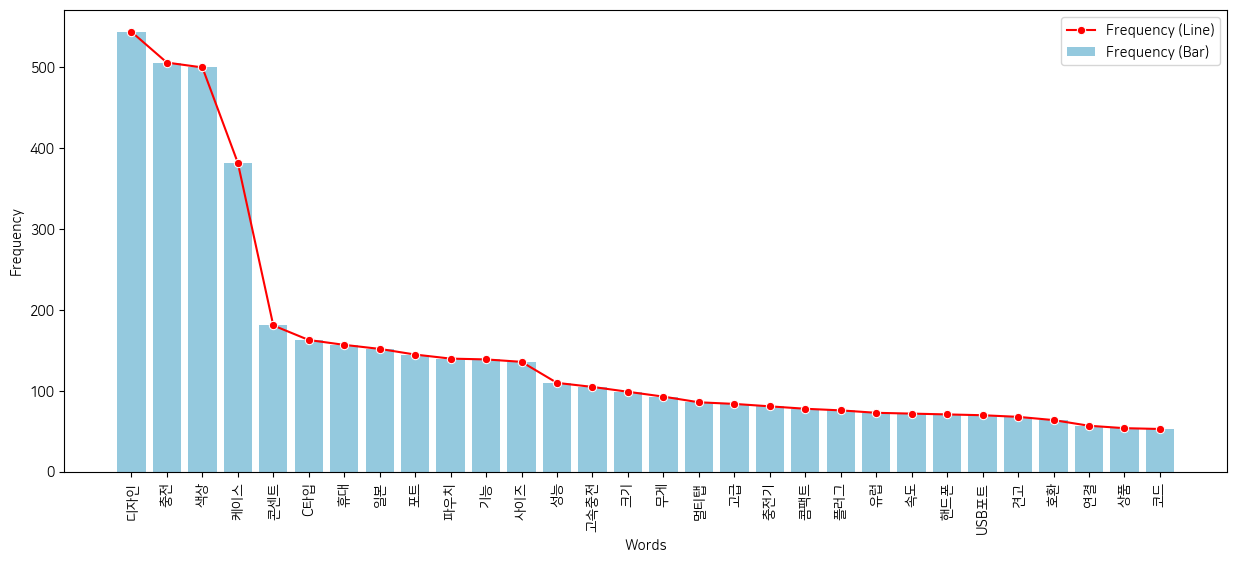

In [667]:
df_words_count_graph = df_top_words[:30]
count_bar_graph('Words', 'Frequency', df_words_count_graph)

#### 2. 빈도수의 변화량

In [668]:
def count_bar_graph(x, y, data):
    plt.rcParams['font.family'] = 'NanumSquareRoundOTF'
    fig, ax = plt.subplots(figsize=(15, 6))
    sns.barplot(x = x, y = y, data = data, ax=ax, color='skyblue', label='Frequency (Bar)')
    sns.lineplot(x = x, y = y, data = data, ax=ax, color='red', marker='o', label='Frequency (Line)')
    # ax.axvline(0, color='black', linestyle='--', linewidth=1)
    
    for idx, row in data.iterrows():
        if row[y] == 0:
            ax.axvline(x=row[x], color='black', linestyle='--', linewidth=1)
    plt.xticks(rotation=90)

In [669]:
df_top_words_changes = df_top_words.copy()

In [670]:
df_top_words_changes

,Words,Frequency,percent,cumsum_percent
0,디자인,544,7.0,7.0
1,충전,506,6.0,13.0
2,색상,500,6.0,19.0
3,케이스,382,5.0,24.0
4,콘센트,181,2.0,26.0
...,...,...,...,...
774,절대,1,0.0,68.0
775,링,1,0.0,68.0
776,지역,1,0.0,68.0
777,점검,1,0.0,68.0


In [671]:
# 현재 행과 다음 행의 차이를 계산 후 그 값을 한칸 shift 후 공백을 채우고 열을 생성
df_top_words_changes['amount_of_changes_1'] = df_top_words_changes['Frequency'].diff(periods=-1).shift(1).fillna(0)
# df_top_words_changes['amount_of_changes_2'] = df_top_words_changes['amount_of_changes_1'].diff(periods=-1).shift(1)

# 각 변화량의 비율 -> 얼마만큼 변한건지 그 비율을 계산 -> 계산을 어떻게 하느냐의 차이(round를 먼저하고 안하고의 차이가 생김)
df_top_words_changes['amount_of_changes_ratio'] = round(df_top_words_changes['amount_of_changes_1'] / sum(df_top_words_changes['amount_of_changes_1']), 2) * 100

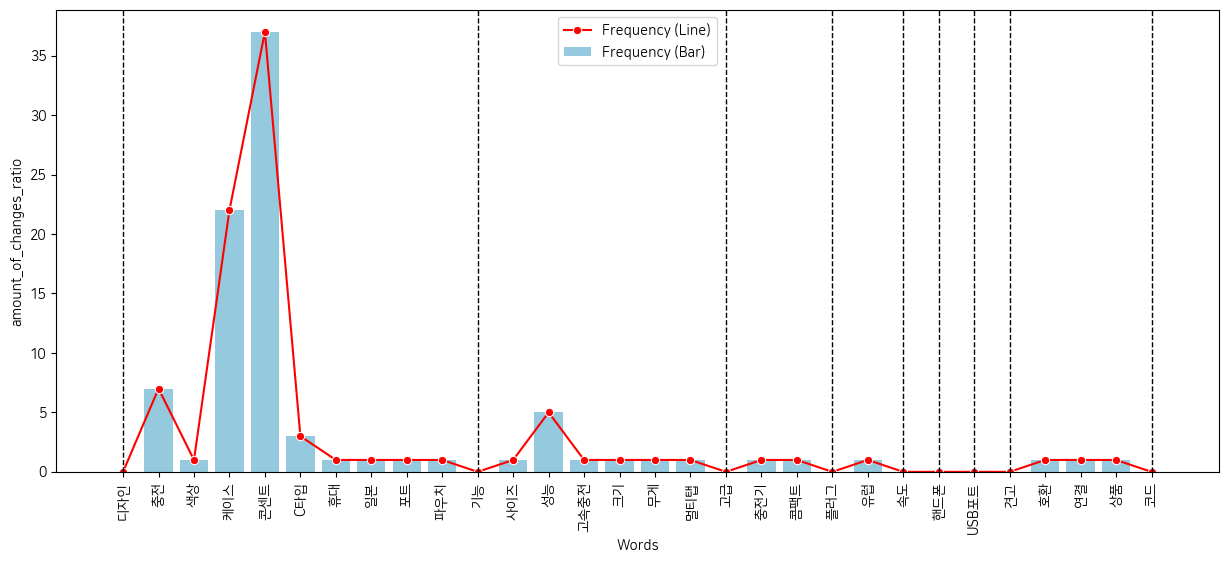

In [672]:
df_changes_graph = df_top_words_changes[:30]
count_bar_graph('Words', 'amount_of_changes_ratio', df_changes_graph)

In [673]:
max_print = 3
print_count = 0

for i in range(1, len(df_top_words_changes)):
    if df_top_words_changes.at[i, 'amount_of_changes_ratio'] == 0:
        print(df_top_words_changes.index[i])
        print_count += 1
        if print_count >= max_print:
            break

10
17
20


sub words 개수 지정

#### 1. 변화량의 폭이 큰 지점의 키워드 개수 평균을(x) 기준으로 subkey words 지정

In [601]:
# related_words_dict = {}

# count = 0
# for i in range(len(df_top_words_changes)): # df_top_words
#     # entity_target 설정
#     entity_target = df_top_words_changes['Words'][i]
#     # entity_pos = df_top_words['pos'][i]
    
#     # # 명사만 처리하도록 필터링
#     # if entity_pos not in ['NNG', 'NNP']:
#     #     continue
    
#     var_name = f'df_{entity_target}'
#     print(var_name)
    
#     # 해당 entity_target을 포함한 행 필터링
#     filtered_df = product_pos[product_pos['add_rule_based_split_review'].str.contains(entity_target)]
    
#     # 관련 단어 추출
#     keyword_lists = sum(filtered_df['Tokenized_sentence'], [])
#     related_words = get_top_n_frequencies(keyword_lists)
    
#     # entity_target 단어 제외
#     related_words = related_words[related_words['Words'] != entity_target]
    
#     # percent와 cumsum_percent 계산
#     total_frequency = related_words['Frequency'].sum()
#     # related_words['percent'] = round((related_words['Frequency'] / total_frequency) * 100, 3)
#     related_words['percent'] = round((related_words['Frequency'] / total_frequency), 3) * 100
#     related_words['cumsum_percent'] = np.cumsum(related_words['percent'])
#     related_words['amount_of_changes'] = related_words['Frequency'].diff(periods=-1).shift(1).fillna(0)
#     related_words['amount_of_changes_ratio'] = round(related_words['amount_of_changes'] / sum(related_words['amount_of_changes']), 2) * 100

#     # 데이터프레임 생성 및 저장
#     related_words_df = pd.DataFrame(related_words, columns=['Words', 'Frequency', 'percent', 'cumsum_percent', 'amount_of_changes', 'amount_of_changes_ratio'])

#     # percent 및 cumsum 조정 -> hyper parameter
#     # related_words_df = related_words_df[related_words_df['percent'] > 2]
#     # related_words_df = related_words_df[related_words_df['cumsum_percent'] < 50]
#     related_words_df = related_words_df.iloc[:, :]
#     related_words_dict[var_name] = related_words_df
    
#     # 전역 변수로 설정
#     globals()[var_name] = related_words_df

#     count += 1

#     if count == 10: # n = 클러스터 갯수 -> hyper parameter
#         break

In [679]:
count = 0
for i in range(len(df_top_words_changes)): # df_top_words
    # entity_target 설정
    entity_target = df_top_words_changes['Words'][i]
    # entity_pos = df_top_words['pos'][i]
    
    # # 명사만 처리하도록 필터링
    # if entity_pos not in ['NNG', 'NNP']:
    #     continue
    
    var_name = f'df_{entity_target}'
    print(var_name)
    
    # 해당 entity_target을 포함한 행 필터링
    filtered_df = product_pos[product_pos['add_rule_based_split_review'].str.contains(entity_target)]
    
    # 관련 단어 추출
    keyword_lists = sum(filtered_df['Tokenized_sentence'], [])
    related_words = get_top_n_frequencies(keyword_lists)
    
    # entity_target 단어 제외
    related_words = related_words[related_words['Words'] != entity_target]
    
    # percent와 cumsum_percent 계산
    total_frequency = related_words['Frequency'].sum()
    # related_words['percent'] = round((related_words['Frequency'] / total_frequency) * 100, 3)
    related_words['percent'] = round((related_words['Frequency'] / total_frequency), 3) * 100
    related_words['cumsum_percent'] = np.cumsum(related_words['percent'])
    related_words['amount_of_changes'] = related_words['Frequency'].diff(periods=-1).shift(1).fillna(0)
    related_words['amount_of_changes_ratio'] = round(related_words['amount_of_changes'] / sum(related_words['amount_of_changes']), 2) * 100

    # 데이터프레임 생성 및 저장
    related_words_df = pd.DataFrame(related_words, columns=['Words', 'Frequency', 'percent', 'cumsum_percent', 'amount_of_changes', 'amount_of_changes_ratio'])

    related_words_df = related_words_df.iloc[:8, :] # 몇 개까지 뽑을 것인가?
    
    # 전역 변수로 설정
    globals()[var_name] = related_words_df

    count += 1

    if count == 10: # n = 클러스터 갯수 -> hyper parameter
        break

df_디자인
df_충전
df_색상
df_케이스
df_콘센트
df_C타입
df_휴대
df_일본
df_포트
df_파우치


In [689]:
df_파우치

,Words,Frequency,percent,cumsum_percent,amount_of_changes,amount_of_changes_ratio
1,디자인,23,14.9,14.9,0.0,0.0
2,색상,17,11.0,25.9,6.0,27.0
3,휴대,13,8.4,34.3,4.0,18.0
4,고급,5,3.2,37.5,8.0,36.0
5,크기,5,3.2,40.7,0.0,0.0
6,연결,3,1.9,42.6,2.0,9.0
7,충전,3,1.9,44.5,0.0,0.0
8,설명서,3,1.9,46.4,0.0,0.0


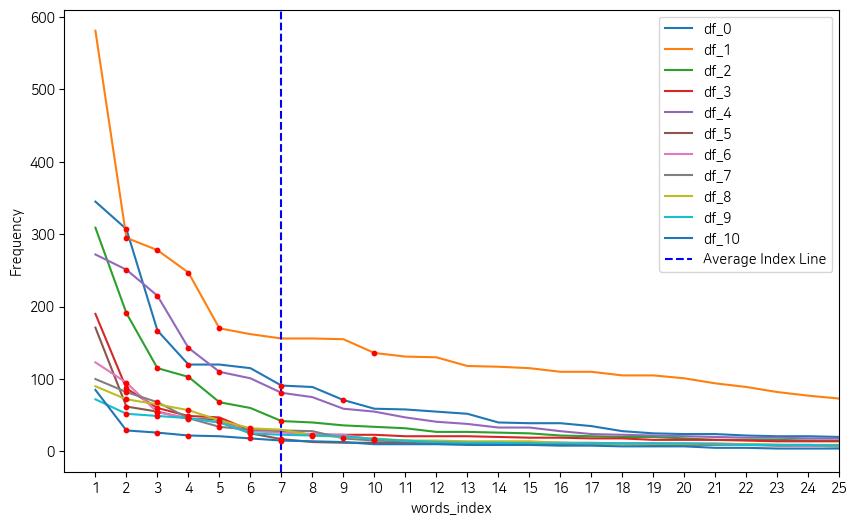

In [603]:
dataframes = [df_흡입력,
df_청소,
df_디자인,
df_성능,
df_먼지,
df_소음,
df_무게,
df_배터리,
df_충전,
df_기능,
df_소리
]

plt.figure(figsize=(10, 6))

# 각 데이터프레임의 평균 인덱스를 저장할 리스트
average_indices = []

for i, df in enumerate(dataframes):
    df['words_index'] = df.index
    
    # Frequency의 라인 그래프
    sns.lineplot(x=df['words_index'], y=df['Frequency'], data=df, label=f"df_{i}")
    
    # 상위 변화량 지점 찾기
    top_indices = df['amount_of_changes'].nlargest(5).index
    plt.scatter(df.loc[top_indices, 'words_index'], df.loc[top_indices, 'Frequency'], color='red', s=10, zorder=5)
    
    # 가장 마지막 점 추출
    if len(top_indices) > 0:
        # 가장 마지막 인덱스 추출 및 올림
        last_point_index = np.ceil(top_indices[-1])
        average_indices.append(last_point_index)

# 평균 인덱스 기반으로 수직선 그리기
if len(average_indices) > 0:
    avg_index = np.mean(average_indices)
    avg_index_ceil = np.ceil(avg_index)  # 평균 인덱스 올림
    plt.axvline(x=avg_index_ceil, color='blue', linestyle='--', label='Average Index Line')

plt.xticks(np.arange(1, 26))  # Adjust based on your data
plt.xlim(0, 25)
plt.legend()
plt.show()


In [604]:
related_words_dict = {}

count = 0
for i in range(len(df_top_words_changes)): # df_top_words
    # entity_target 설정
    entity_target = df_top_words_changes['Words'][i]
    # entity_pos = df_top_words['pos'][i]
    
    # # 명사만 처리하도록 필터링
    # if entity_pos not in ['NNG', 'NNP']:
    #     continue
    
    var_name = f'df_{entity_target}'
    print(var_name)
    
    # 해당 entity_target을 포함한 행 필터링
    filtered_df = product_pos[product_pos['add_rule_based_split_review'].str.contains(entity_target)]
    
    # 관련 단어 추출
    keyword_lists = sum(filtered_df['Tokenized_sentence'], [])
    related_words = get_top_n_frequencies(keyword_lists)
    
    # entity_target 단어 제외
    related_words = related_words[related_words['Words'] != entity_target]
    
    # percent와 cumsum_percent 계산
    total_frequency = related_words['Frequency'].sum()
    # related_words['percent'] = round((related_words['Frequency'] / total_frequency) * 100, 3)
    related_words['percent'] = round((related_words['Frequency'] / total_frequency), 3) * 100
    related_words['cumsum_percent'] = np.cumsum(related_words['percent'])
    related_words['amount_of_changes'] = related_words['Frequency'].diff(periods=-1).shift(1).fillna(0)
    related_words['amount_of_changes_ratio'] = round(related_words['amount_of_changes'] / sum(related_words['amount_of_changes']), 2) * 100

    # 데이터프레임 생성 및 저장
    related_words_df = pd.DataFrame(related_words, columns=['Words', 'Frequency', 'percent', 'cumsum_percent', 'amount_of_changes', 'amount_of_changes_ratio'])

    # percent 및 cumsum 조정 -> hyper parameter
    # related_words_df = related_words_df[related_words_df['percent'] > 2]
    # related_words_df = related_words_df[related_words_df['cumsum_percent'] < 50]
    related_words_df = related_words_df.iloc[:7, :]
    related_words_dict[var_name] = related_words_df
    
    # 전역 변수로 설정
    globals()[var_name] = related_words_df

    count += 1

    if count == 11: # n = 클러스터 갯수 -> hyper parameter
        break

df_흡입력
df_청소
df_디자인
df_성능
df_먼지
df_소음
df_무게
df_배터리
df_충전
df_기능
df_소리


#### 2. Frequency의 변화량을 기준으로 회귀선을 그려 서브속성의 개수를 지정해주는 방법

단, Frequency가 80이상이면 frequency 변화량이 큰 지점의 5번째 까지  
60-80 = 4번째 까지   
40-60 = 3번째 까지  
20-40 = 2번째 까지  
20 미만은 1번째 까지로 지정  


이산확률분포

In [605]:
count = 0
for i in range(len(df_top_words_changes)): # df_top_words
    # entity_target 설정
    entity_target = df_top_words_changes['Words'][i]
    # entity_pos = df_top_words['pos'][i]
    
    # # 명사만 처리하도록 필터링
    # if entity_pos not in ['NNG', 'NNP']:
    #     continue
    
    var_name = f'df_{entity_target}'
    print(var_name)
    
    # 해당 entity_target을 포함한 행 필터링
    filtered_df = product_pos[product_pos['add_rule_based_split_review'].str.contains(entity_target)]
    
    # 관련 단어 추출
    keyword_lists = sum(filtered_df['Tokenized_sentence'], [])
    related_words = get_top_n_frequencies(keyword_lists)
    
    # entity_target 단어 제외
    related_words = related_words[related_words['Words'] != entity_target]
    
    # percent와 cumsum_percent 계산
    total_frequency = related_words['Frequency'].sum()
    # related_words['percent'] = round((related_words['Frequency'] / total_frequency) * 100, 3)
    related_words['percent'] = round((related_words['Frequency'] / total_frequency), 3) * 100
    related_words['cumsum_percent'] = np.cumsum(related_words['percent'])
    related_words['amount_of_changes'] = related_words['Frequency'].diff(periods=-1).shift(1).fillna(0)
    related_words['amount_of_changes_ratio'] = round(related_words['amount_of_changes'] / sum(related_words['amount_of_changes']), 2) * 100

    # 데이터프레임 생성 및 저장
    related_words_df = pd.DataFrame(related_words, columns=['Words', 'Frequency', 'percent', 'cumsum_percent', 'amount_of_changes', 'amount_of_changes_ratio'])

    related_words_df = related_words_df.iloc[:30, :] # 몇 개까지 뽑을 것인가?
    
    # 전역 변수로 설정
    globals()[var_name] = related_words_df

    count += 1

    if count == 11: # n = 클러스터 갯수 -> hyper parameter
        break

df_흡입력
df_청소
df_디자인
df_성능
df_먼지
df_소음
df_무게
df_배터리
df_충전
df_기능
df_소리


In [606]:
from scipy.stats import poisson
from scipy.stats import chisquare

dataframes = [df_흡입력,
df_청소,
df_디자인,
df_성능,
df_먼지,
df_소음,
df_무게,
df_배터리,
df_충전,
df_기능,
df_소리
]

for df in dataframes:
    # 데이터의 평균을 포아송 분포의 λ로 설정
    mean_frequency = df['Frequency'].mean()
    print(mean_frequency)
    lambda_ = mean_frequency

    # 각 빈도수에 대한 포아송 확률 계산
    df['poisson_prob'] = poisson.pmf(df['Frequency'], lambda_)

    # 빈도 표 생성
    observed_freq = df['Frequency'].value_counts().sort_index()
    observed_freq = observed_freq.reindex(range(int(observed_freq.index.max()) + 1), fill_value=0)  # Ensure all bins are included
    expected_freq = poisson.pmf(range(len(observed_freq)), lambda_) * len(df)

    # 카이제곱 검정
    chi2_stat, p_value = chisquare(f_obs=observed_freq, f_exp=expected_freq)
    print(f"Chi-squared Statistic: {chi2_stat}, p-value: {p_value}")


69.26666666666667
Chi-squared Statistic: 1.0191221781675267e+121, p-value: 0.0
141.53333333333333
Chi-squared Statistic: 6.075451283938315e+165, p-value: 0.0
46.03333333333333
Chi-squared Statistic: 2.950420757291052e+141, p-value: 0.0
29.566666666666666
Chi-squared Statistic: 7.887863554961217e+83, p-value: 0.0
61.43333333333333
Chi-squared Statistic: 2.8072221547173935e+84, p-value: 0.0
21.133333333333333
Chi-squared Statistic: 1.6796483230090057e+90, p-value: 0.0
22.466666666666665
Chi-squared Statistic: 1.3341950397245995e+47, p-value: 0.0
22.066666666666666
Chi-squared Statistic: 5.042437167961576e+31, p-value: 0.0
22.0
Chi-squared Statistic: 2.6993044035608867e+25, p-value: 0.0
18.933333333333334
Chi-squared Statistic: 3.7339369941138263e+18, p-value: 0.0
12.566666666666666
Chi-squared Statistic: 9.92218947544454e+38, p-value: 0.0


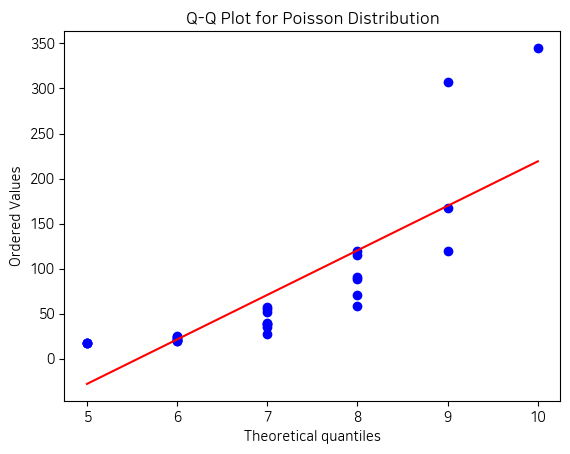

In [607]:
import scipy.stats as stats

# Q-Q 플롯
stats.probplot(df_흡입력['Frequency'], dist="poisson", sparams=(2, 5), plot=plt)
plt.title('Q-Q Plot for Poisson Distribution')
plt.show()


C:\Users\shopperhouse\AppData\Local\Temp\ipykernel_7460\2732838845.py:84: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


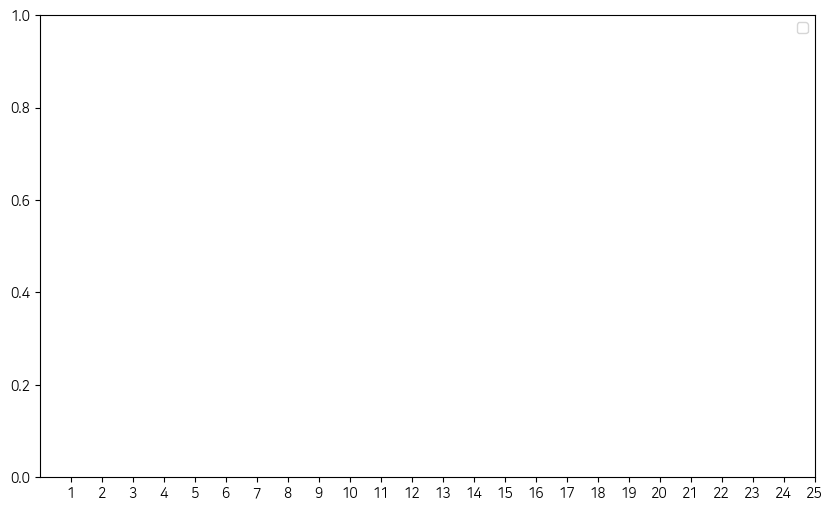

In [613]:
from sklearn.linear_model import LinearRegression

dataframes = [df_흡입력,
df_청소,
df_디자인,
df_성능,
df_먼지,
df_소음,
df_무게,
df_배터리,
df_충전,
df_기능,
df_소리
]

plt.figure(figsize=(10, 6))

# 가장 마지막 점들을 저장할 리스트
last_points = []

for i, df in enumerate(dataframes):
    df['words_index'] = df.index
    
    # Frequency의 라인 그래프
    sns.lineplot(x=df['words_index'], y=df['Frequency'], data=df, label=f"df_{i}")
    
    # Frequency 값에 따른 상위 변화량 지점 찾기
    # 해당 범위를 지정해주는 부분이 다 달라서 최적화를 어떻게 해야할지 모르겠음
    top_indices = []
    for _, row in df.iterrows():
        frequency_value = row['Frequency']
        
        if frequency_value >= 600:
            top_n = 8
        elif 400 <= frequency_value < 600:
            top_n = 7
        elif 300 <= frequency_value < 400:
            top_n = 5
        elif 100 <= frequency_value < 300:
            top_n = 4
        else:
            top_n = 3
        
        # 상위 변화량 지점 인덱스 추가
        top_indices.extend(df['amount_of_changes_ratio'].nlargest(top_n).index)
    
    # 중복된 인덱스 제거
    top_indices = list(set(top_indices))
    
    # 상위 변화량 지점에 scatter plot 추가
    plt.scatter(df.loc[top_indices, 'words_index'], df.loc[top_indices, 'Frequency'], color='red', s=10, zorder=5)
    
    # 가장 마지막 점 추출
if len(top_indices) > 0:
    last_point_index = top_indices[-1]
    last_point = df.loc[last_point_index, ['words_index', 'Frequency']]
    last_points.append(last_point)

# 가장 마지막 점들에 대해 회귀 분석 수행
if len(last_points) > 1:
    last_points_df = pd.DataFrame(last_points)
    X = last_points_df['words_index'].values.reshape(-1, 1)
    y = last_points_df['Frequency'].values.reshape(-1, 1)
    
    # 회귀 분석 모델 생성 및 학습
    reg = LinearRegression().fit(X, y)

    # 회귀선의 기울기와 절편
    slope = reg.coef_[0][0]
    intercept = reg.intercept_[0]

    # 회귀선의 함수 출력
    print(f"회귀선 함수: y = {slope:.4f} * x + {intercept:.4f}")
    
    # 회귀선 예측
    x_pred = np.linspace(X.min(), X.max(), 100).reshape(-1, 1)
    y_pred = reg.predict(x_pred)
    
    # 회귀선 그래프 추가
    plt.plot(x_pred, y_pred, color='blue', linestyle='--', label='Regression Line')

plt.xticks(np.arange(1, 26))  # Adjust based on your data
plt.xlim(0, 25)
plt.legend()
plt.show()


In [610]:
df_성능

,Words,Frequency,percent,cumsum_percent,amount_of_changes,amount_of_changes_ratio,poisson_prob,words_index
1,디자인,190,12.0,12.0,0.0,0.0,4.225901e-86,1
2,청소,87,5.5,17.5,103.0,54.0,6.242305e-18,2
3,흡입력,60,3.8,21.3,27.0,14.0,3.071333e-07,3
4,배터리,49,3.1,24.4,11.0,6.0,2.783369e-04,4
5,소음,47,3.0,27.4,2.0,1.0,7.488648e-04,5
6,소리,29,1.8,29.2,18.0,10.0,7.346654e-02,6
7,크기,28,1.8,31.0,1.0,1.0,7.205850e-02,7
8,사이즈,23,1.5,32.5,5.0,3.0,3.761142e-02,8
9,기능,23,1.5,34.0,0.0,0.0,3.761142e-02,9
10,색상,23,1.5,35.5,0.0,0.0,3.761142e-02,10


연속확률분포

In [434]:
count = 0
for i in range(len(df_top_words_changes)): # df_top_words
    # entity_target 설정
    entity_target = df_top_words_changes['Words'][i]
    # entity_pos = df_top_words['pos'][i]
    
    # # 명사만 처리하도록 필터링
    # if entity_pos not in ['NNG', 'NNP']:
    #     continue
    
    var_name = f'df_{entity_target}'
    print(var_name)
    
    # 해당 entity_target을 포함한 행 필터링
    filtered_df = product_pos[product_pos['add_rule_based_split_review'].str.contains(entity_target)]
    
    # 관련 단어 추출
    keyword_lists = sum(filtered_df['Tokenized_sentence'], [])
    related_words = get_top_n_frequencies(keyword_lists)
    
    # entity_target 단어 제외
    related_words = related_words[related_words['Words'] != entity_target]
    
    # percent와 cumsum_percent 계산
    total_frequency = related_words['Frequency'].sum()
    # related_words['percent'] = round((related_words['Frequency'] / total_frequency) * 100, 3)
    related_words['percent'] = round((related_words['Frequency'] / total_frequency), 3)
    related_words['cumsum_percent'] = np.cumsum(related_words['percent'])
    related_words['amount_of_changes'] = related_words['Frequency'].diff(periods=-1).shift(1).fillna(0)
    related_words['amount_of_changes_ratio'] = round(related_words['amount_of_changes'] / sum(related_words['amount_of_changes']), 2)
    related_words['amount_of_percnet_changes'] = related_words['percent'].diff(periods=-1).shift(1).fillna(0)
    related_words['amount_of_percent_changes_ratio'] = round(related_words['amount_of_percnet_changes'] / sum(related_words['amount_of_percnet_changes']), 2)

    # 데이터프레임 생성 및 저장
    related_words_df = pd.DataFrame(related_words, columns=['Words', 'Frequency', 'percent', 'cumsum_percent', 'amount_of_changes', 'amount_of_changes_ratio', 'amount_of_percnet_changes', 'amount_of_percent_changes_ratio'])

    related_words_df = related_words_df.iloc[:, :] # 몇 개까지 뽑을 것인가?
    
    # 전역 변수로 설정
    globals()[var_name] = related_words_df

    count += 1

    if count == 11: # n = 클러스터 갯수 -> hyper parameter
        break

df_흡입력
df_청소
df_디자인
df_성능
df_먼지
df_소음
df_무게
df_배터리
df_충전
df_기능
df_소리


In [422]:
df_흡입력

,Words,Frequency,percent,cumsum_percent,amount_of_changes,amount_of_changes_ratio,amount_of_percnet_changes,amount_of_percent_changes_ratio,words_index
1,청소,345,0.098,0.098,0.0,0.00,0.000,0.00,1
2,디자인,307,0.087,0.185,38.0,0.11,0.011,0.11,2
3,소음,167,0.047,0.232,140.0,0.41,0.040,0.41,3
4,크기,120,0.034,0.266,47.0,0.14,0.013,0.13,4
5,무게,120,0.034,0.300,0.0,0.00,0.000,0.00,5
...,...,...,...,...,...,...,...,...,...
566,경험,1,0.000,0.951,0.0,0.00,0.000,0.00,566
567,이과,1,0.000,0.951,0.0,0.00,0.000,0.00,567
568,소,1,0.000,0.951,0.0,0.00,0.000,0.00,568
569,사용량,1,0.000,0.951,0.0,0.00,0.000,0.00,569


회귀선 함수: y = -0.0017 * x + 0.0369


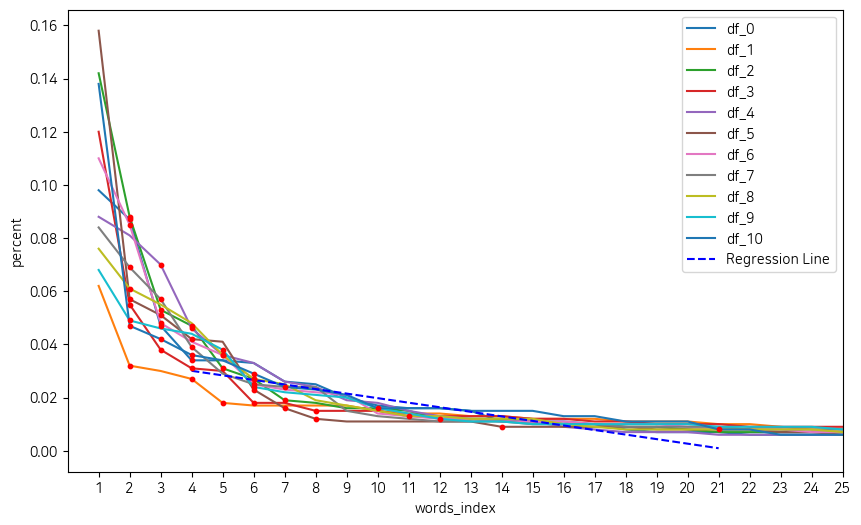

In [423]:
from sklearn.linear_model import LinearRegression

dataframes = [df_흡입력,
df_청소,
df_디자인,
df_성능,
df_먼지,
df_소음,
df_무게,
df_배터리,
df_충전,
df_기능,
df_소리
]

plt.figure(figsize=(10, 6))

# 가장 마지막 점들을 저장할 리스트
last_points = []

for i, df in enumerate(dataframes):
    df['words_index'] = df.index
    
    # Frequency의 라인 그래프
    sns.lineplot(x=df['words_index'], y=df['percent'], data=df, label=f"df_{i}")
    
    # Frequency 값에 따른 상위 변화량 지점 찾기
    # 해당 범위를 지정해주는 부분이 다 달라서 최적화를 어떻게 해야할지 모르겠음
    top_indices = []
    for _, row in df.iterrows():
        percent_value = row['percent']
        
        if percent_value >= 0.12:
            top_n = 7
        elif 0.8 <= percent_value < 0.12:
            top_n = 6
        elif 0.6 <= percent_value < 0.8:
            top_n = 5
        elif 0.4 <= percent_value < 0.6:
            top_n = 4
        else:
            top_n = 3
        
        # 상위 변화량 지점 인덱스 추가
        top_indices.extend(df['amount_of_percnet_changes'].nlargest(top_n).index)
    
    # 중복된 인덱스 제거
    top_indices = list(set(top_indices))
    
    # 상위 변화량 지점에 scatter plot 추가
    plt.scatter(df.loc[top_indices, 'words_index'], df.loc[top_indices, 'percent'], color='red', s=10, zorder=5)
    
    # 가장 마지막 점 추출
    if len(top_indices) > 0:
        last_point_index = top_indices[-1]
        last_point = df.loc[last_point_index, ['words_index', 'percent']]
        last_points.append(last_point)

# 가장 마지막 점들에 대해 회귀 분석 수행
if len(last_points) > 1:
    last_points_df = pd.DataFrame(last_points)
    X = last_points_df['words_index'].values.reshape(-1, 1)
    y = last_points_df['percent'].values.reshape(-1, 1)
    
    # 회귀 분석 모델 생성 및 학습
    reg = LinearRegression().fit(X, y)

    # 회귀선의 기울기와 절편
    slope = reg.coef_[0][0]
    intercept = reg.intercept_[0]

    # 회귀선의 함수 출력
    print(f"회귀선 함수: y = {slope:.4f} * x + {intercept:.4f}")
    
    # 회귀선 예측
    x_pred = np.linspace(X.min(), X.max(), 100).reshape(-1, 1)
    y_pred = reg.predict(x_pred)
    
    # 회귀선 그래프 추가
    plt.plot(x_pred, y_pred, color='blue', linestyle='--', label='Regression Line')

plt.xticks(np.arange(1, 26))  # Adjust based on your data
plt.xlim(0, 25)
plt.legend()
plt.show()


In [416]:
# import scipy.stats as stats

# # Q-Q 플롯
#     stats.probplot(df_흡입력['percent'], dist="beta", sparams=(2, 5), plot=plt)
#     plt.title('Q-Q Plot for Beta Distribution')
#     plt.show()


In [419]:
from scipy.stats import kstest

# 베타 분포와 K-S 테스트
for df in dataframes:
    d_statistic, p_value = kstest(df['percent'], 'expon', args=(2, 5))
    print(f"K-S Statistic: {d_statistic}, p-value: {p_value}")


K-S Statistic: 1.0, p-value: 0.0
K-S Statistic: 1.0, p-value: 0.0
K-S Statistic: 1.0, p-value: 0.0
K-S Statistic: 1.0, p-value: 0.0
K-S Statistic: 1.0, p-value: 0.0
K-S Statistic: 1.0, p-value: 0.0
K-S Statistic: 1.0, p-value: 0.0
K-S Statistic: 1.0, p-value: 0.0
K-S Statistic: 1.0, p-value: 0.0
K-S Statistic: 1.0, p-value: 0.0
K-S Statistic: 1.0, p-value: 0.0


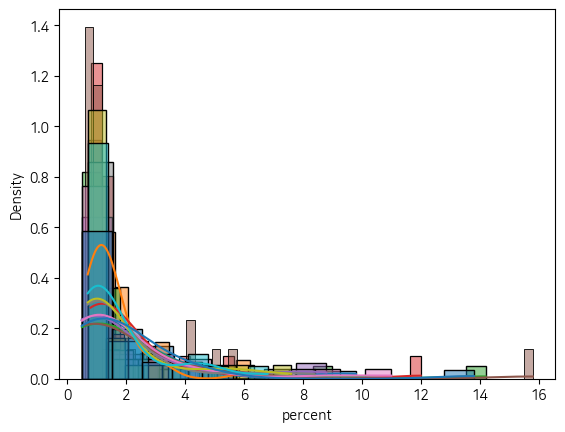

In [436]:
for df in dataframes:
    sns.histplot(df['percent'], kde=True, stat='density')

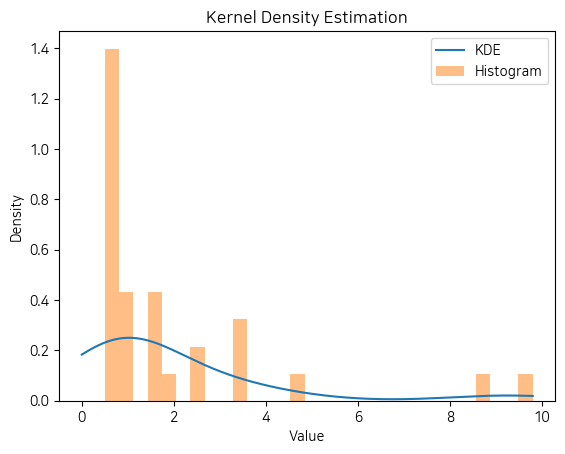

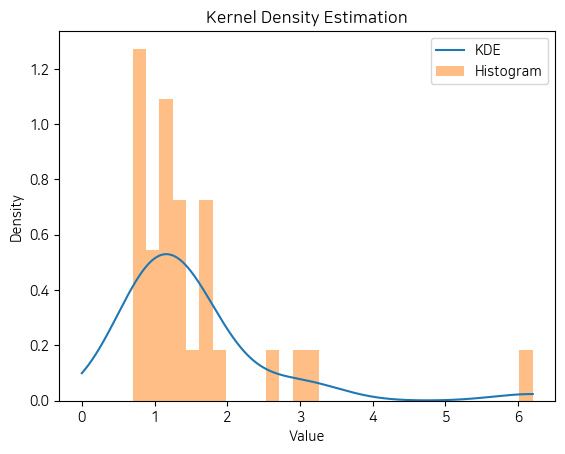

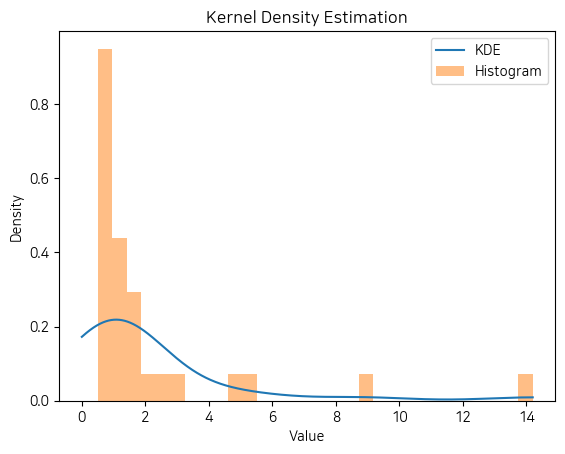

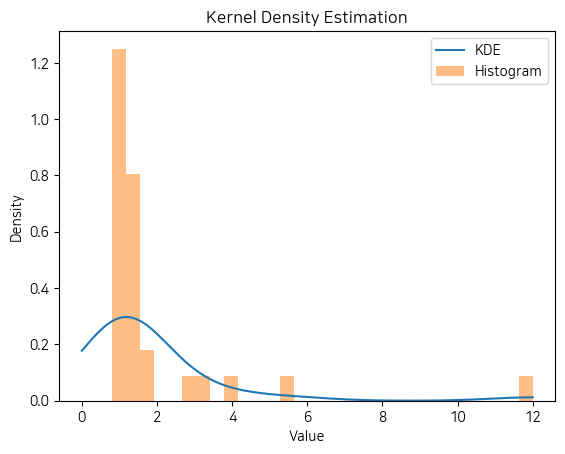

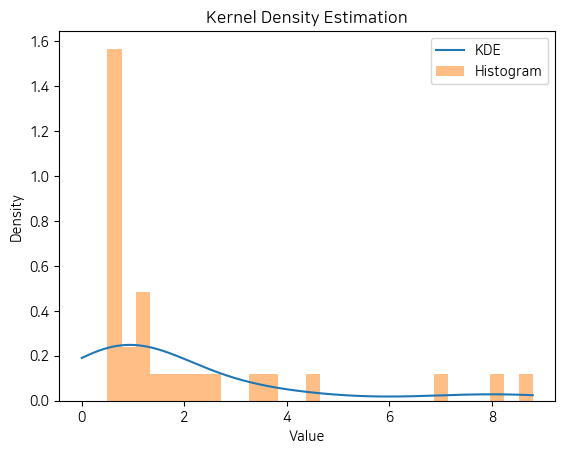

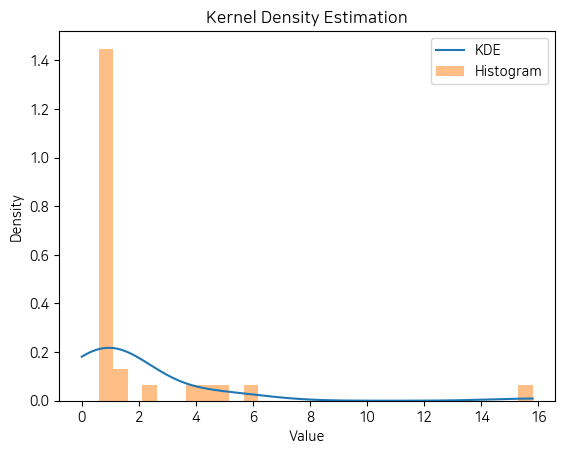

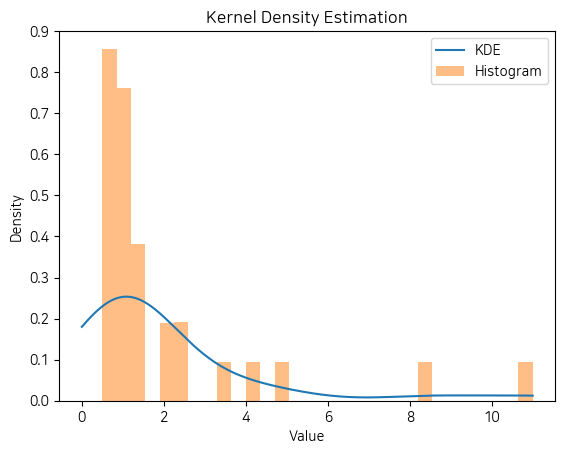

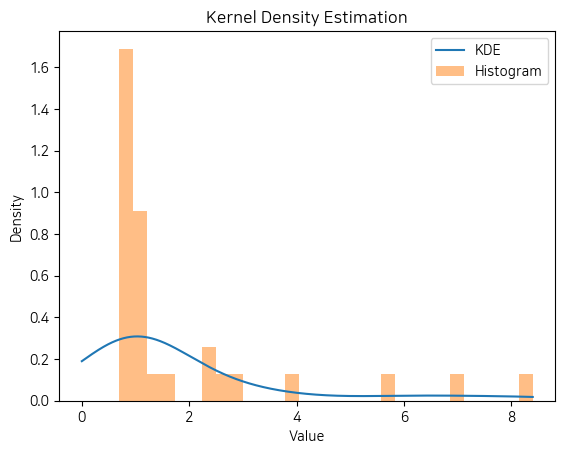

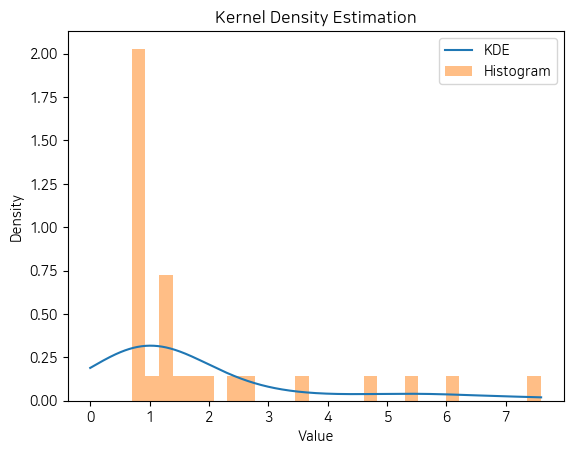

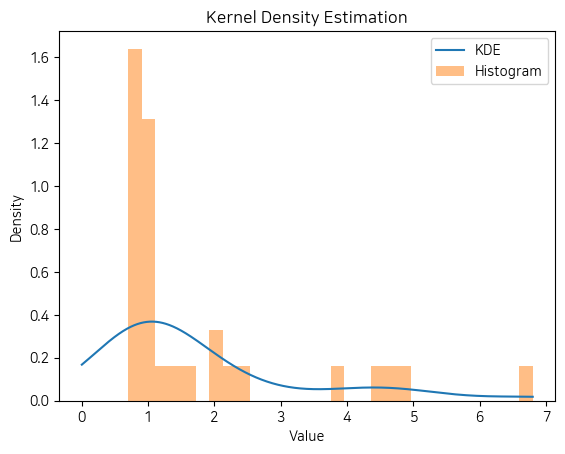

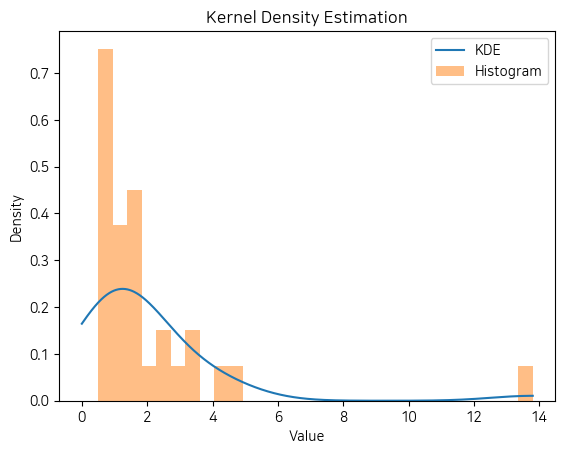

In [437]:
import numpy as np
from scipy.stats import gaussian_kde

for df in dataframes:
    # KDE 객체 생성
    kde = gaussian_kde(df['percent'], bw_method='scott')  # 'scott'는 자동으로 대역폭을 조절합니다

    # KDE 평가
    x = np.linspace(0, np.max(df['percent']), 1000)
    kde_pdf = kde.evaluate(x)

    # KDE 플롯
    plt.plot(x, kde_pdf, label='KDE')
    plt.hist(df['percent'], density=True, bins=30, alpha=0.5, label='Histogram')
    plt.xlabel('Value')
    plt.ylabel('Density')
    plt.title('Kernel Density Estimation')
    plt.legend()
    plt.show()


In [435]:
# from scipy.stats import beta, kstest
# import numpy as np

# # 데이터 스케일링: 0과 1 사이로 변환
# for df in dataframes:
#     scaled_data = (df['percent'] - df['percent'].min()) / (df['percent'].max() - df['percent'].min())
    
#     # 0과 1에 가까운 값들을 조정하여 0과 1을 벗어나지 않게 함
#     scaled_data = np.clip(scaled_data, 0.001, 0.999)

#     # K-S 테스트를 통해 베타 분포와 비교
#     d_statistic, p_value = kstest(scaled_data, 'beta', args=(2, 5))
#     print(f"K-S Statistic: {d_statistic}, p-value: {p_value}")

#     # 베타 분포의 모수 추정 (MLE)
#     alpha, beta_param, loc, scale = beta.fit(scaled_data, floc=0, fscale=1)

#     # 베타 분포의 확률 밀도 함수 (PDF) 식을 문자열로 생성
#     beta_pdf_equation = f"f(x; α, β) = (x^({alpha:.4f} - 1) * (1 - x)^({beta_param:.4f} - 1)) / B({alpha:.4f}, {beta_param:.4f})"

#     print(f"Alpha (α): {alpha:.4f}, Beta (β): {beta_param:.4f}")
#     print(f"Beta Distribution PDF: {beta_pdf_equation}")


In [399]:
from scipy.stats import beta, kstest
import numpy as np

# 데이터 스케일링: 0과 1 사이로 변환 및 베타 분포 적합
for df in dataframes:
    min_val = df['percent'].min()
    max_val = df['percent'].max()
    scaled_data = (df['percent'] - min_val) / (max_val - min_val)
    
    # 0과 1에 가까운 값들을 조정하여 0과 1을 벗어나지 않게 함
    scaled_data = np.clip(scaled_data, 0.001, 0.999)

    # K-S 테스트를 통해 베타 분포와 비교
    d_statistic, p_value = kstest(scaled_data, 'beta', args=(2, 5))
    print(f"K-S Statistic: {d_statistic}, p-value: {p_value}")

    # 베타 분포의 모수 추정 (MLE)
    alpha, beta_param, loc, scale = beta.fit(scaled_data, floc=0, fscale=1)

    # 원래 데이터 스케일에 맞게 베타 분포의 PDF 변환
    beta_pdf_equation = f"f(x; α, β) = ((x - {min_val:.4f})^({alpha:.4f} - 1) * ({max_val:.4f} - x)^({beta_param:.4f} - 1)) / " \
                        f"(({max_val:.4f} - {min_val:.4f})^({alpha + beta_param - 1:.4f}) * B({alpha:.4f}, {beta_param:.4f}))"

    print(f"Alpha (α): {alpha:.4f}, Beta (β): {beta_param:.4f}")
    print(f"Original Scale Beta Distribution PDF: {beta_pdf_equation}")


K-S Statistic: 0.5245534893730768, p-value: 3.241833581002368e-08
Alpha (α): 0.3233, Beta (β): 1.0448
Original Scale Beta Distribution PDF: f(x; α, β) = ((x - 0.5000)^(0.3233 - 1) * (9.8000 - x)^(1.0448 - 1)) / ((9.8000 - 0.5000)^(0.3681) * B(0.3233, 1.0448))
K-S Statistic: 0.533297376343989, p-value: 1.6981488472279662e-08
Alpha (α): 0.4605, Beta (β): 1.4818
Original Scale Beta Distribution PDF: f(x; α, β) = ((x - 0.7000)^(0.4605 - 1) * (6.2000 - x)^(1.4818 - 1)) / ((6.2000 - 0.7000)^(0.9423) * B(0.4605, 1.4818))
K-S Statistic: 0.6813988909641264, p-value: 2.3887896096289914e-14
Alpha (α): 0.3375, Beta (β): 1.2861
Original Scale Beta Distribution PDF: f(x; α, β) = ((x - 0.5000)^(0.3375 - 1) * (14.2000 - x)^(1.2861 - 1)) / ((14.2000 - 0.5000)^(0.6236) * B(0.3375, 1.2861))
K-S Statistic: 0.7394992795501616, p-value: 2.296516257698458e-17
Alpha (α): 0.3008, Beta (β): 1.2849
Original Scale Beta Distribution PDF: f(x; α, β) = ((x - 0.8000)^(0.3008 - 1) * (12.0000 - x)^(1.2849 - 1)) / ((12.

In [407]:
from scipy.stats import beta
from scipy.optimize import minimize
import numpy as np
import pandas as pd

# 회귀선 함수 정의
def regression_line(x, slope, intercept):
    return slope * x + intercept

# 베타 분포의 PDF (원래 범위) 정의
def beta_pdf_original(x, alpha, beta_param, x_min, x_max):
    x_scaled = (x - x_min) / (x_max - x_min)
    return beta.pdf(x_scaled, alpha, beta_param) / ((x_max - x_min) ** (alpha + beta_param - 2))

# 두 함수 간의 차이를 계산하는 함수
def difference(x, alpha, beta_param, x_min, x_max, slope, intercept):
    return abs(regression_line(x, slope, intercept) - beta_pdf_original(x, alpha, beta_param, x_min, x_max))

# 회귀선의 기울기와 절편
slope = -0.5819
intercept = 5.8707

# 데이터프레임 리스트 예시 (여기서는 df_list라는 변수명 사용)

dataframes = [df_흡입력,
df_청소,
df_디자인,
df_성능,
df_먼지,
df_소음,
df_무게,
df_배터리,
df_충전,
df_기능,
df_소리
]

# 결과를 저장할 리스트
results = []

for df in dataframes:
    # 데이터 스케일링: 0과 1 사이로 변환
    scaled_data = (df['percent'] - df['percent'].min()) / (df['percent'].max() - df['percent'].min())
    
    # 0과 1에 가까운 값들을 조정하여 0과 1을 벗어나지 않게 함
    scaled_data = np.clip(scaled_data, 0.001, 0.999)
    
    # 베타 분포의 파라미터 추정 (MLE)
    alpha, beta_param, loc, scale = beta.fit(scaled_data, floc=0, fscale=1)
    
    # 데이터의 원래 범위
    x_min = df['percent'].min()
    x_max = df['percent'].max()
    
    # 최적화 문제를 풀어서 차이가 최소화되는 x 값을 찾음
    result = minimize(difference, x0=[(x_min + x_max) / 2], args=(alpha, beta_param, x_min, x_max, slope, intercept), bounds=[(x_min, x_max)])
    
    # 교차점의 x 값과 y 값 계산
    x_cross = result.x[0]
    y_cross = regression_line(x_cross, slope, intercept)
    
    # 베타 분포 PDF 식
    beta_pdf_equation = (
        f"f(x; α, β) = ((x - {x_min:.4f})^({alpha:.4f} - 1) * ({x_max:.4f} - x)^({beta_param:.4f} - 1)) / "
        f"(({x_max:.4f} - {x_min:.4f})^({alpha + beta_param - 2:.4f}) * B({alpha:.4f}, {beta_param:.4f}))"
    )
    
    
    # 결과 출력
    print(f"Alpha (α): {alpha:.4f}, Beta (β): {beta_param:.4f}")
    print(f"교차점: x = {x_cross:.4f}, y = {y_cross:.4f}")
    print(f"Beta Distribution PDF (Original Scale): {beta_pdf_equation}")
    print("\n" + "="*50 + "\n")

# 결과를 데이터프레임으로 변환
# results_df = pd.DataFrame(results)


Alpha (α): 0.3233, Beta (β): 1.0448
교차점: x = 9.8000, y = 0.1681
Beta Distribution PDF (Original Scale): f(x; α, β) = ((x - 0.5000)^(0.3233 - 1) * (9.8000 - x)^(1.0448 - 1)) / ((9.8000 - 0.5000)^(-0.6319) * B(0.3233, 1.0448))


Alpha (α): 0.4605, Beta (β): 1.4818
교차점: x = 6.1390, y = 2.2984
Beta Distribution PDF (Original Scale): f(x; α, β) = ((x - 0.7000)^(0.4605 - 1) * (6.2000 - x)^(1.4818 - 1)) / ((6.2000 - 0.7000)^(-0.0577) * B(0.4605, 1.4818))


Alpha (α): 0.3375, Beta (β): 1.2861
교차점: x = 8.0398, y = 1.1923
Beta Distribution PDF (Original Scale): f(x; α, β) = ((x - 0.5000)^(0.3375 - 1) * (14.2000 - x)^(1.2861 - 1)) / ((14.2000 - 0.5000)^(-0.3764) * B(0.3375, 1.2861))


Alpha (α): 0.3008, Beta (β): 1.2849
교차점: x = 8.6849, y = 0.8169
Beta Distribution PDF (Original Scale): f(x; α, β) = ((x - 0.8000)^(0.3008 - 1) * (12.0000 - x)^(1.2849 - 1)) / ((12.0000 - 0.8000)^(-0.4143) * B(0.3008, 1.2849))


Alpha (α): 0.3011, Beta (β): 0.8975
교차점: x = 6.1068, y = 2.3171
Beta Distribution PDF (O

In [389]:
from scipy.stats import beta

# 베타 분포의 모수 추정 (MLE)
alpha, beta_param, loc, scale = beta.fit(df_흡입력['percent'], floc=0, fscale=1)

# 베타 분포의 확률 밀도 함수 (PDF) 식을 문자열로 생성
beta_pdf_equation = f"f(x; α, β) = (x^({alpha:.4f} - 1) * (1 - x)^({beta_param:.4f} - 1)) / B({alpha:.4f}, {beta_param:.4f})"

print(f"Alpha (α): {alpha:.4f}, Beta (β): {beta_param:.4f}")
print(f"Beta Distribution PDF: {beta_pdf_equation}")


FitDataError: Invalid values in `data`.  Maximum likelihood estimation with 'beta' requires that 0 < (x - loc)/scale  < 1 for each x in `data`.

#### 3. 메인과 동일하게

In [614]:
count = 0
for i in range(len(df_top_words_changes)): # df_top_words
    # entity_target 설정
    entity_target = df_top_words_changes['Words'][i]
    # entity_pos = df_top_words['pos'][i]
    
    # # 명사만 처리하도록 필터링
    # if entity_pos not in ['NNG', 'NNP']:
    #     continue
    
    var_name = f'df_{entity_target}'
    print(var_name)
    
    # 해당 entity_target을 포함한 행 필터링
    filtered_df = product_pos[product_pos['add_rule_based_split_review'].str.contains(entity_target)]
    
    # 관련 단어 추출
    keyword_lists = sum(filtered_df['Tokenized_sentence'], [])
    related_words = get_top_n_frequencies(keyword_lists)
    
    # entity_target 단어 제외
    related_words = related_words[related_words['Words'] != entity_target]
    
    # percent와 cumsum_percent 계산
    total_frequency = related_words['Frequency'].sum()
    # related_words['percent'] = round((related_words['Frequency'] / total_frequency) * 100, 3)
    related_words['percent'] = round((related_words['Frequency'] / total_frequency), 3)
    related_words['cumsum_percent'] = np.cumsum(related_words['percent'])
    related_words['amount_of_changes'] = related_words['Frequency'].diff(periods=-1).shift(1).fillna(0)
    related_words['amount_of_changes_ratio'] = round(related_words['amount_of_changes'] / sum(related_words['amount_of_changes']), 2)
    related_words['amount_of_percnet_changes'] = related_words['percent'].diff(periods=-1).shift(1).fillna(0)
    related_words['amount_of_percent_changes_ratio'] = round(related_words['amount_of_percnet_changes'] / sum(related_words['amount_of_percnet_changes']), 2)

    # 데이터프레임 생성 및 저장
    related_words_df = pd.DataFrame(related_words, columns=['Words', 'Frequency', 'percent', 'cumsum_percent', 'amount_of_changes', 'amount_of_changes_ratio', 'amount_of_percnet_changes', 'amount_of_percent_changes_ratio'])

    related_words_df = related_words_df.iloc[:, :] # 몇 개까지 뽑을 것인가?
    
    # 전역 변수로 설정
    globals()[var_name] = related_words_df

    count += 1

    if count == 11: # n = 클러스터 갯수 -> hyper parameter
        break

df_흡입력
df_청소
df_디자인
df_성능
df_먼지
df_소음
df_무게
df_배터리
df_충전
df_기능
df_소리


In [618]:
df_청소[: 30]

,Words,Frequency,percent,cumsum_percent,amount_of_changes,amount_of_changes_ratio,amount_of_percnet_changes,amount_of_percent_changes_ratio
1,흡입력,581,0.062,0.062,0.0,0.00,0.000,0.00
2,먼지,295,0.032,0.094,286.0,0.49,0.030,0.48
3,성능,278,0.030,0.124,17.0,0.03,0.002,0.03
4,디자인,247,0.027,0.151,31.0,0.05,0.003,0.05
5,머리카락,170,0.018,0.169,77.0,0.13,0.009,0.15
6,미니,162,0.017,0.186,8.0,0.01,0.001,0.02
7,무게,156,0.017,0.203,6.0,0.01,0.000,0.00
8,배터리,156,0.017,0.220,0.0,0.00,0.000,0.00
9,기능,155,0.017,0.237,1.0,0.00,0.000,0.00
10,소음,136,0.015,0.252,19.0,0.03,0.002,0.03


In [626]:
product_pos[product_pos['add_rule_based_split_review'].str.contains('청소', na = False)]

,add_rule_based_split_review,Tokenized_sentence,Tokenized_sentence_list,Tokenized_morphs
23,딱 원하던 사이즈와 기능을 가진 청소기라서 만족합니다,"[사이즈, 기능]","사이즈, 기능","사이즈, 기능"
28,아이 지우개 청소용으로 사용하고 있는데 만족해요,"[지우개, 청소용]","지우개, 청소용","지우개, 청소용"
31,에어서큘레이터 청소 가능 작지만 힘 좋음,"[서큘레이터, 청소]","서큘레이터, 청소","서큘레이터, 청소"
52,아주 훌륭한 미니 청소기입니다,[미니],미니,미니
85,미니어처 청소기,[미니어처],미니어처,미니어처
...,...,...,...,...
47573,그리고 삼성 청소기인 줄 알았는데 그것도 아닌 듯,[삼성],삼성,삼성
47592,청소 잘되고 디자인이 깔끔해서 거실에 놔둬도 보기 싫지가 않네요,"[청소, 디자인, 거실]","청소, 디자인, 거실","청소, 디자인, 거실"
47594,좋은 청소기입니다,[],,
47606,저희 집 청소기가 너무 좋아서 어르신들 양쪽 집에 다사 드렸습니다,"[어르신, 양쪽]","어르신, 양쪽","어르신, 양쪽"


In [631]:
df_흡입력

,Words,Frequency,percent,cumsum_percent,amount_of_changes,amount_of_changes_ratio,amount_of_percnet_changes,amount_of_percent_changes_ratio
1,청소,345,0.098,0.098,0.0,0.00,0.000,0.00
2,디자인,307,0.087,0.185,38.0,0.11,0.011,0.11
3,소음,167,0.047,0.232,140.0,0.41,0.040,0.41
4,크기,120,0.034,0.266,47.0,0.14,0.013,0.13
5,무게,120,0.034,0.300,0.0,0.00,0.000,0.00
...,...,...,...,...,...,...,...,...
566,경험,1,0.000,0.951,0.0,0.00,0.000,0.00
567,이과,1,0.000,0.951,0.0,0.00,0.000,0.00
568,소,1,0.000,0.951,0.0,0.00,0.000,0.00
569,사용량,1,0.000,0.951,0.0,0.00,0.000,0.00


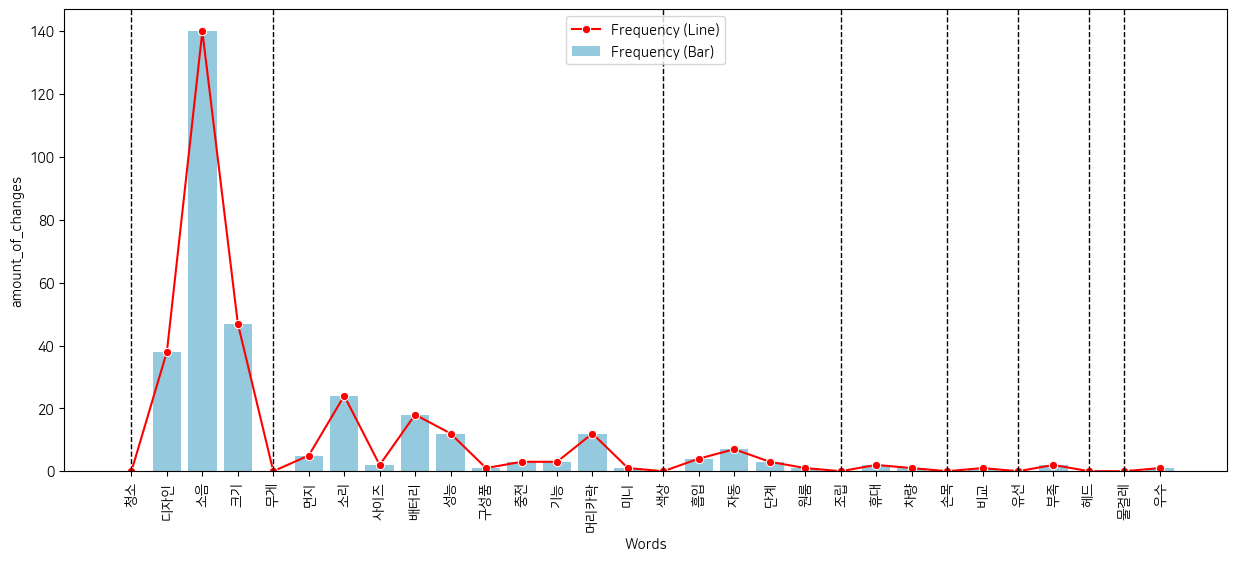

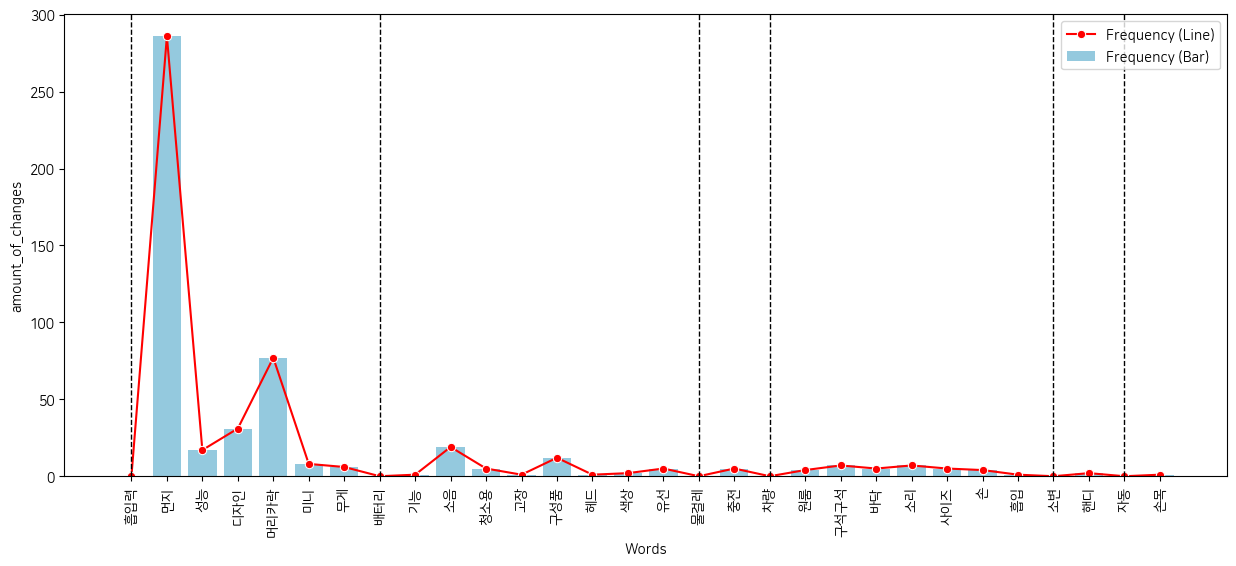

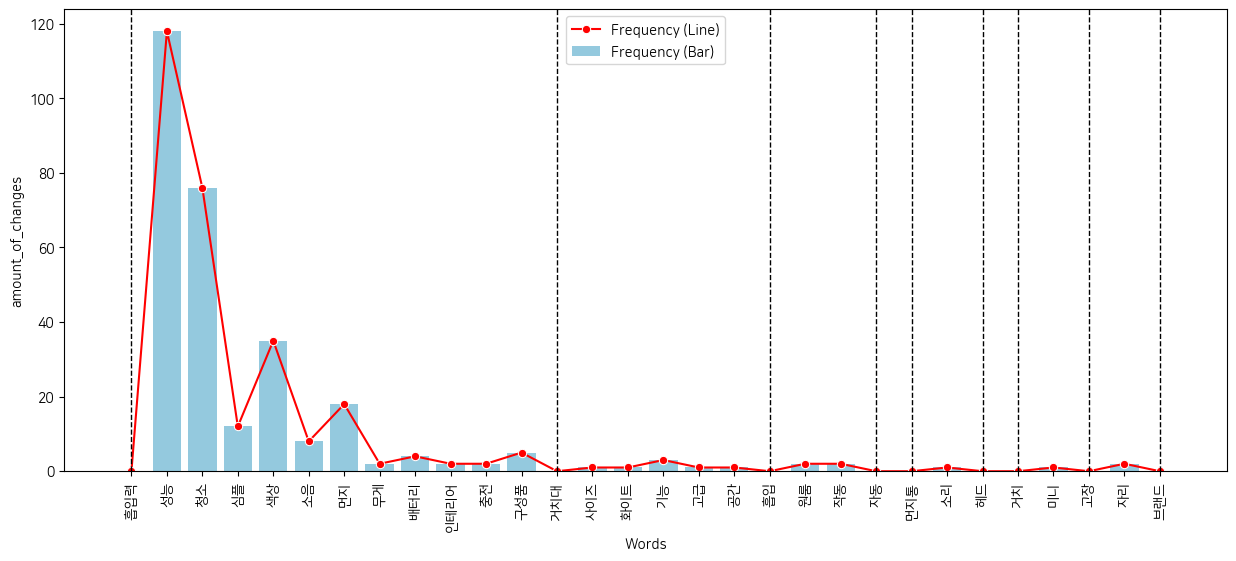

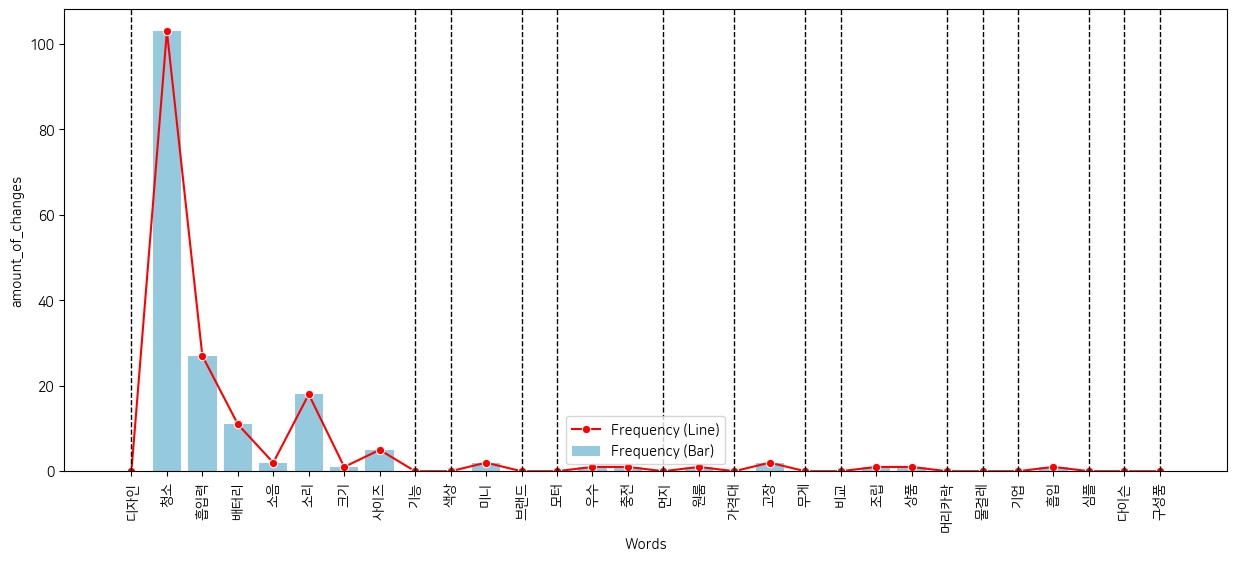

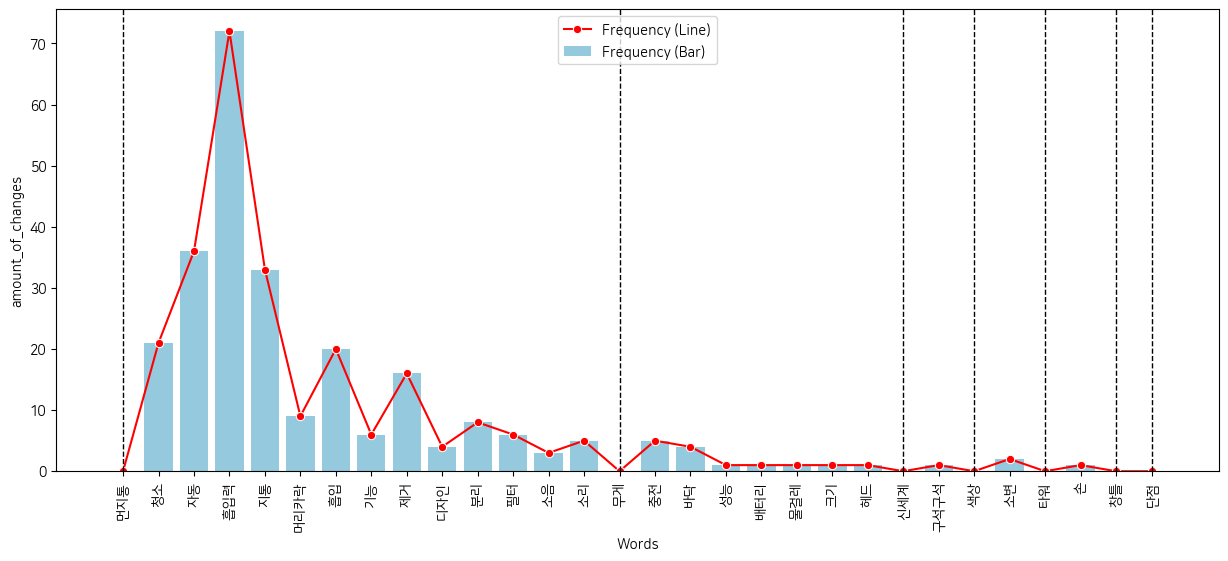

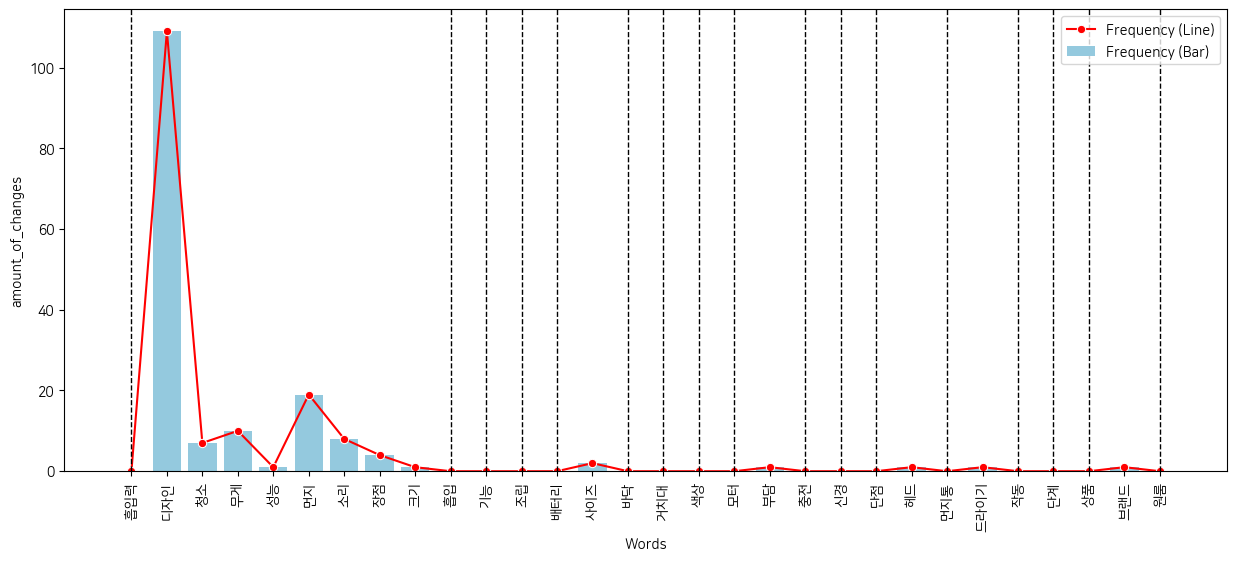

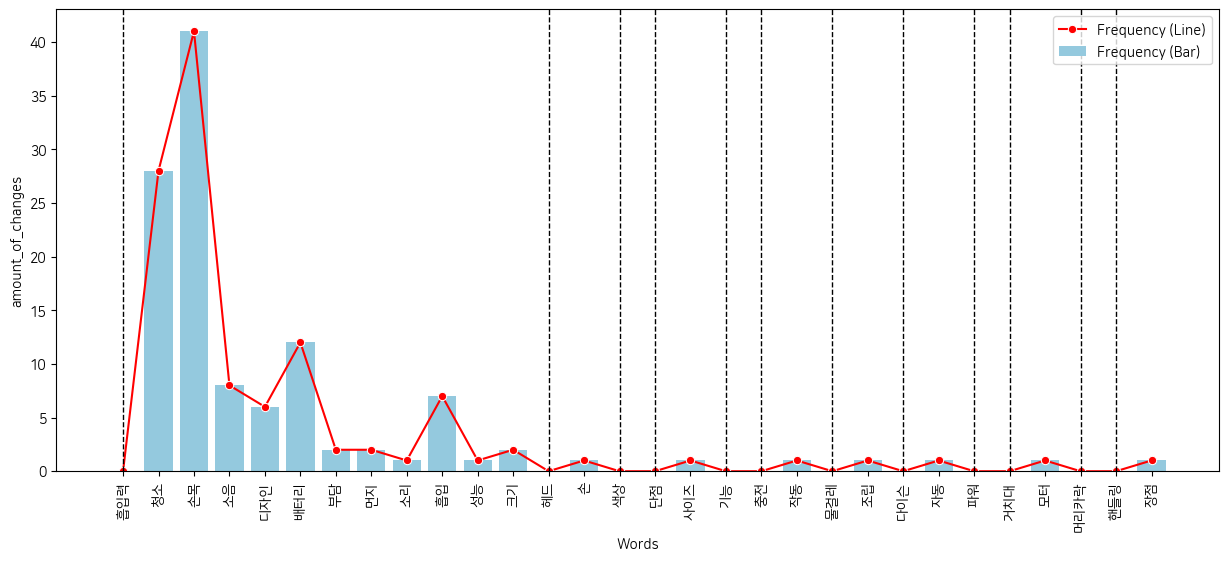

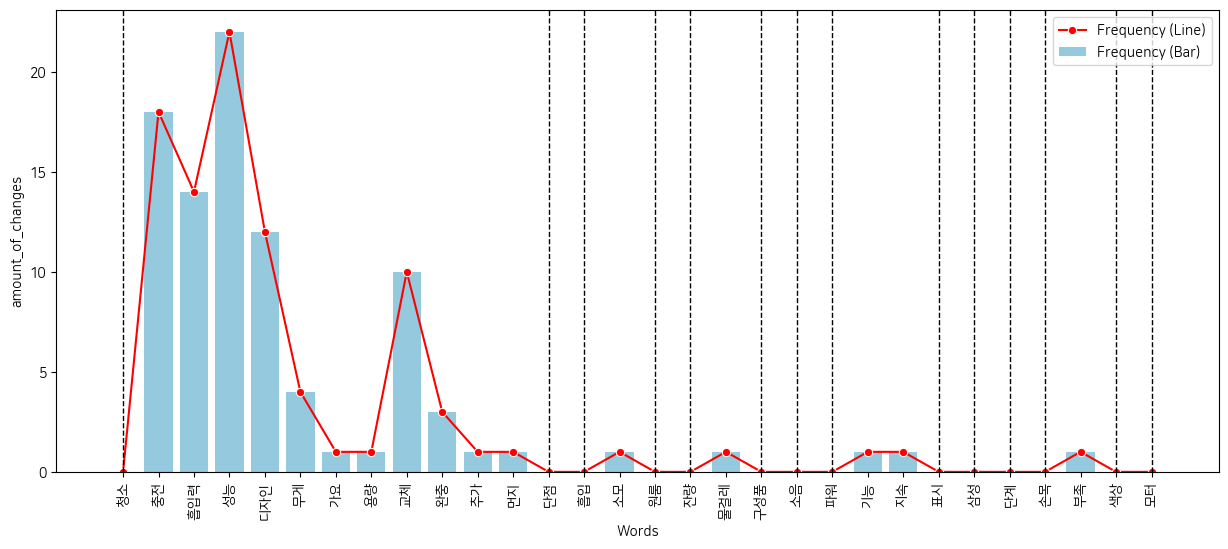

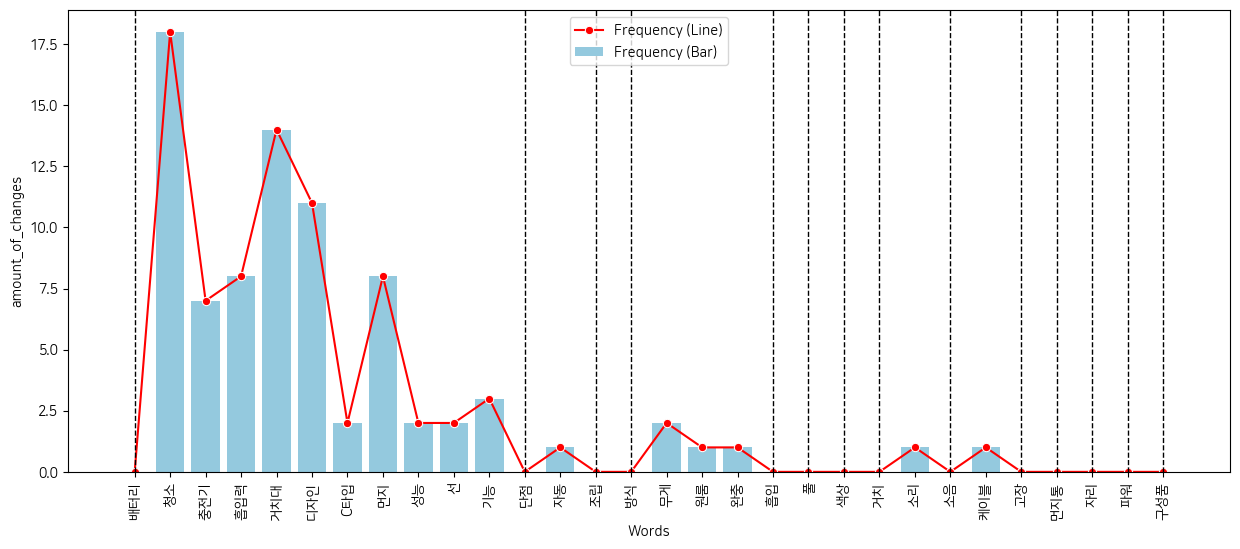

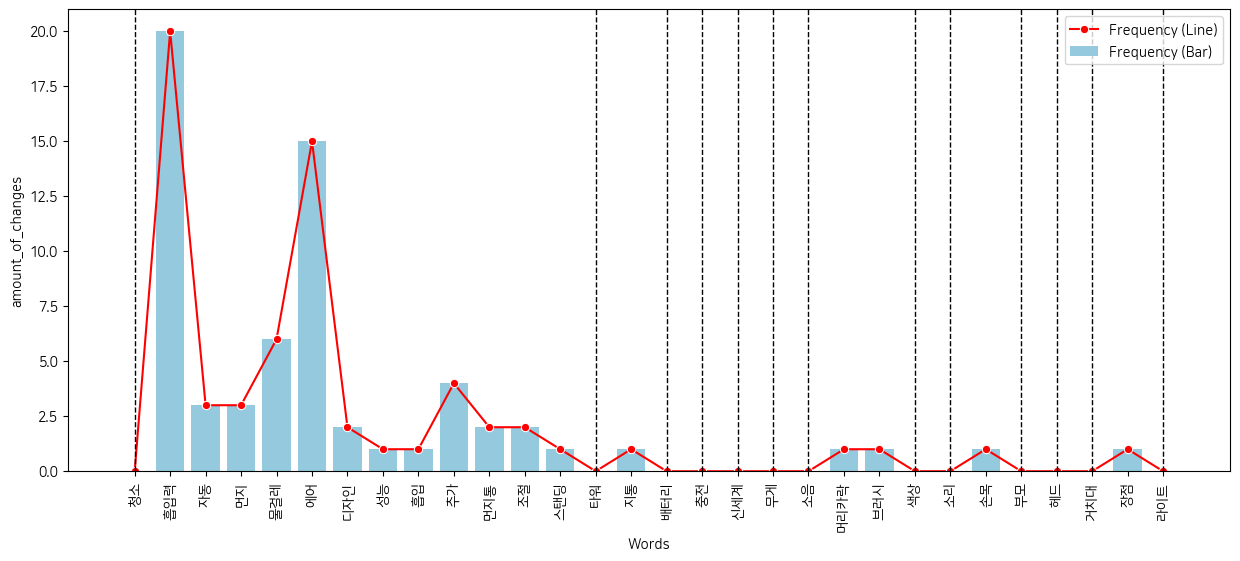

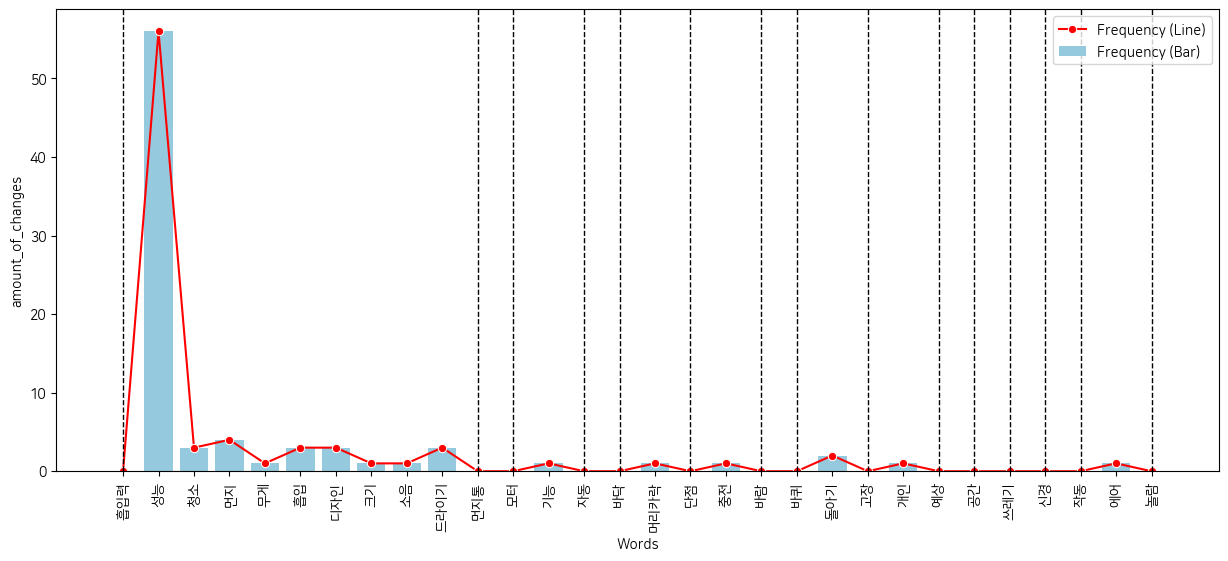

In [634]:
for df in dataframes:
    df_changes_graph = df[:30]
    count_bar_graph('Words', 'amount_of_changes', df_changes_graph)

#### 2차 Clustering - 각 대표 속성끼리의 중복을 검사

서브 속성의 갯수를 cumsum이 50으로 잡았으면 similarity가 어느정도 되어야 적절할지?  
-> 해당 부분에 대한건 실험을 조금 더 해봐야할 것 같음. 경험적으로 특정 값의 평균을 알 수 있을 것으로 예상

그래프를 기준으로 봤다면? 어느정도로?

In [342]:
# cumsum_percent < 50 인 단어만 추출
clusters_words_subset = {}
for cluster_name, df in related_words_dict.items():
    clusters_words_subset[cluster_name] = set(df['Words'])

similarity_results = {}
cluster_names = list(clusters_words_subset.keys())

for i in range(len(cluster_names)):
    for j in range(i + 1, len(cluster_names)):
        cluster_1 = cluster_names[i]
        cluster_2 = cluster_names[j]
        words_1 = clusters_words_subset[cluster_1]
        words_2 = clusters_words_subset[cluster_2]
        # print(words_1)
        
        common_words = words_1.intersection(words_2)
        total_unique_words = len(words_1.union(words_2))
        
        # 공통 단어 비율 계산
        common_percentage = (len(common_words) / total_unique_words) * 100 if total_unique_words > 0 else 0
        
        # 결과 저장
        similarity_results[(cluster_1, cluster_2)] = common_percentage

similarity_results

{('df_흡입력', 'df_청소'): 27.27272727272727,
 ('df_흡입력', 'df_디자인'): 27.27272727272727,
 ('df_흡입력', 'df_성능'): 55.55555555555556,
 ('df_흡입력', 'df_먼지'): 7.6923076923076925,
 ('df_흡입력', 'df_소음'): 55.55555555555556,
 ('df_흡입력', 'df_무게'): 27.27272727272727,
 ('df_흡입력', 'df_배터리'): 27.27272727272727,
 ('df_흡입력', 'df_충전'): 16.666666666666664,
 ('df_흡입력', 'df_기능'): 27.27272727272727,
 ('df_흡입력', 'df_소리'): 40.0,
 ('df_청소', 'df_디자인'): 27.27272727272727,
 ('df_청소', 'df_성능'): 16.666666666666664,
 ('df_청소', 'df_먼지'): 16.666666666666664,
 ('df_청소', 'df_소음'): 55.55555555555556,
 ('df_청소', 'df_무게'): 16.666666666666664,
 ('df_청소', 'df_배터리'): 40.0,
 ('df_청소', 'df_충전'): 16.666666666666664,
 ('df_청소', 'df_기능'): 27.27272727272727,
 ('df_청소', 'df_소리'): 55.55555555555556,
 ('df_디자인', 'df_성능'): 27.27272727272727,
 ('df_디자인', 'df_먼지'): 16.666666666666664,
 ('df_디자인', 'df_소음'): 40.0,
 ('df_디자인', 'df_무게'): 27.27272727272727,
 ('df_디자인', 'df_배터리'): 27.27272727272727,
 ('df_디자인', 'df_충전'): 16.666666666666664,
 ('df_디자인'

In [72]:
# from sklearn.metrics.pairwise import cosine_similarity
# import numpy as np

# def compute_cosine_similarity(df1, df2):
#     # 단어와 빈도수를 벡터로 변환
#     all_words = list(set(df1['Words']).union(set(df2['Words'])))
#     vec1 = np.array([df1[df1['Words'] == word]['Frequency'].sum() if word in df1['Words'].values else 0 for word in all_words])
#     vec2 = np.array([df2[df2['Words'] == word]['Frequency'].sum() if word in df2['Words'].values else 0 for word in all_words])
    
#     # 코사인 유사도 계산
#     return cosine_similarity([vec1], [vec2])[0][0]

# # 유사도 계산
# clusters_words_subset = {}
# for cluster_name, df in related_words_dict.items():
#     clusters_words_subset[cluster_name] = set(df['Words'])
# cluster_names = list(clusters_words_subset.keys())

# similarity_results_cosine = {}

# for i in range(len(cluster_names)):
#     for j in range(i + 1, len(cluster_names)):
#         cluster_1 = cluster_names[i]
#         cluster_2 = cluster_names[j]
#         df1 = related_words_dict[cluster_1]
#         df2 = related_words_dict[cluster_2]
        
#         similarity = compute_cosine_similarity(df1, df2)
#         similarity_results_cosine[(cluster_1, cluster_2)] = similarity

# similarity_results_cosine


In [73]:
# # 코사인 유사도 예시
# def compute_cosine_similarity(df1, df2):
#     # 단어와 빈도수를 벡터로 변환
#     all_words = list(set(df1['Words']).union(set(df2['Words'])))
#     vec1 = np.array([df1[df1['Words'] == word]['Frequency'].sum() if word in df1['Words'].values else 0 for word in all_words])
#     vec2 = np.array([df2[df2['Words'] == word]['Frequency'].sum() if word in df2['Words'].values else 0 for word in all_words])
    
#     # 코사인 유사도 계산
#     return all_words, vec1, vec2, cosine_similarity([vec1], [vec2])[0][0]

# compute_cosine_similarity(df_파우치, df_포트)

In [352]:
class UnionFind:
    def __init__(self):
        self.parent = {}

    def find(self, item):
        if item not in self.parent:
            self.add(item)
        if self.parent[item] == item:
            return item
        else:
            root = self.find(self.parent[item])
            self.parent[item] = root  # 경로 압축
            return root

    def union(self, item1, item2):
        root1 = self.find(item1)
        root2 = self.find(item2)
        if root1 != root2:
            self.parent[root2] = root1

    def add(self, item):
        if item not in self.parent:
            self.parent[item] = item

# 데이터프레임을 병합하는 딕셔너리
related_words_dict_2 = {}

# 유니온-파인드 구조 생성
uf = UnionFind()

# 각 데이터프레임을 유니온-파인드 구조에 추가
for cluster, similarity in similarity_results.items():
    if similarity >= 45:
        df1, df2 = cluster
        uf.add(df1)
        uf.add(df2)
        uf.union(df1, df2)

# 그룹을 추적하는 딕셔너리
groups = {}

# 각 데이터프레임을 그룹핑
for df_name in related_words_dict.keys():
    root = uf.find(df_name)
    if root not in groups:
        groups[root] = []
    groups[root].append(df_name)

# 그룹별로 데이터프레임 병합
for df_name in related_words_dict.keys():
    root = uf.find(df_name)
    if root in related_words_dict_2:
        related_words_dict_2[root] = pd.concat([related_words_dict_2[root], related_words_dict[df_name]], axis=0).drop_duplicates(subset='Words').reset_index(drop=True)
    else:
        related_words_dict_2[root] = related_words_dict[df_name]

# 그룹별로 묶인 데이터프레임 이름 출력
for root, df_names in groups.items():
    print(f"Root: {root}")
    print("DataFrames:", df_names)


Root: df_청소
DataFrames: ['df_흡입력', 'df_청소', 'df_성능', 'df_소음', 'df_무게', 'df_배터리', 'df_소리']
Root: df_디자인
DataFrames: ['df_디자인']
Root: df_먼지
DataFrames: ['df_먼지']
Root: df_충전
DataFrames: ['df_충전']
Root: df_기능
DataFrames: ['df_기능']


In [353]:
related_words_dict_2

{'df_청소':    Words  Frequency  percent  cumsum_percent  amount_of_changes  \
 0     청소        345      9.8             9.8                0.0   
 1    디자인        307      8.7            18.5               38.0   
 2     소음        167      4.7            23.2              140.0   
 3     크기        120      3.4            26.6               47.0   
 4     무게        120      3.4            30.0                0.0   
 5     먼지        115      3.3            33.3                5.0   
 6     소리         91      2.6            35.9               24.0   
 7    흡입력        581      6.2             6.2                0.0   
 8     성능        278      3.0            12.4               17.0   
 9   머리카락        170      1.8            16.9               77.0   
 10    미니        162      1.7            18.6                8.0   
 11   배터리         49      3.1            24.4               11.0   
 12    손목         54      4.8            24.3               41.0   
 13    부담         26      2.3          

#### 3. 서브 속성 재배치

#### 3-1. 두개 비교

In [261]:
# cumsum_percent < 50 인 단어만 추출

# related_words_dict_1에서 df_name와 Words만 subset한 dictionary
clusters_words_subset_2 = {}
for cluster_name, df in related_words_dict_2.items(): # related_words_dict_2 -> cluster 2번까지 적용된 dictionary
    clusters_words_subset_2[cluster_name] = set(df['Words'])

cluster_names = list(clusters_words_subset_2.keys())
# common_words_lst = []

for i in range(len(cluster_names)):
    for j in range(i + 1, len(cluster_names)):
        words_1 = clusters_words_subset_2[cluster_names[i]]
        words_2 = clusters_words_subset_2[cluster_names[j]]
        
        common_words = words_1.intersection(words_2)
        common_words_list = list(common_words)

cluster_1 = related_words_dict_2.get(cluster_names[0])
cluster_2 = related_words_dict_2.get(cluster_names[1])


In [262]:
final_cluster_1 = cluster_1.copy()
final_cluster_2 = cluster_2.copy()

for i in range(len(common_words_list)):
    words_ratio_1 = round(((cluster_1[cluster_1['Words'] == common_words_list[i]]['Frequency'].values[0]) / (df_top_words[df_top_words['Words'] == common_words_list[i]]['Frequency'].values[0])), 3)
    words_ratio_2 = round(((cluster_2[cluster_2['Words'] == common_words_list[i]]['Frequency'].values[0]) /( df_top_words[df_top_words['Words'] == common_words_list[i]]['Frequency'].values[0])), 3)

    if words_ratio_1 > words_ratio_2 :
        try :
            index_to_drop = final_cluster_2[final_cluster_2['Words'] == common_words_list[i]].index
            final_cluster_2 = final_cluster_2.drop(index_to_drop, axis = 0, inplace=False)
        except Exception as e:
            print(f"서브 속성 재배치 실패 : {e}")
    else :
        try :
            index_to_drop = final_cluster_1[final_cluster_1['Words'] == common_words_list[i]].index
            final_cluster_1 = final_cluster_1.drop(index_to_drop, axis = 0, inplace=False)
        except Exception as e:
            print(f"서브 속성 재배치 실패 : {e}")

IndexError: index 0 is out of bounds for axis 0 with size 0

In [ ]:
print(len(cluster_1), len(cluster_2))

67 44


In [ ]:
print(len(final_cluster_1), len(final_cluster_2))

64 30


In [ ]:
final_cluster_1[final_cluster_1['Words'] == '디자인']

,Words,Frequency,percent,cumsum_percent


In [ ]:
final_cluster_1.to_csv('C:/Users/shopperhouse/Code/GEN_Ailee/final_cluster_1.csv', encoding='utf-8-sig')
final_cluster_2.to_csv('C:/Users/shopperhouse/Code/GEN_Ailee/final_cluster_2.csv', encoding='utf-8-sig')

#### 3-2. 두번째 방법

In [ ]:
# import itertools

# def get_set_by_name(name):
#     return globals()[name]

# def find_intersections(sets_names):
#     sets = [get_set_by_name(name) for name in sets_names]
#     n = len(sets)
#     results = []
#     # 모든 가능한 부분집합에 대해 겹치는 요소 찾기
#     for r in range(n + 1):
#         for combo in itertools.combinations(range(n), r):
#             if combo:  # 공집합은 생략
#                 intersection = sets[combo[0]]
#                 for i in combo[1:]:
#                     intersection = intersection.intersection(sets[i])
#                 results.append({"Set Combination": tuple(sets_names[i] for i in combo), "Intersection": intersection})
#             else:
#                 results.append({"Set Combination": combo, "Intersection": set()})
#     return results

# def intersection_to_df(sets_names):
#     intersections = find_intersections(sets_names)
#     # 데이터프레임으로 변환
#     df = pd.DataFrame(intersections)
#     # 결과 출력
#     return df

# def count_subset_num(sets):
#     return len(sets)
    
# # 필터링 되는지 확인
# #df_sample[df_sample['Intersection'].apply(lambda x: len(x) < 1)]['Intersection'].value_counts()
# # 예시 실행
# df_sample = intersection_to_df(set_list)
# df_sample['set_number'] = df_sample['Set Combination'].apply(count_subset_num)
# df_sample = df_sample[df_sample['Intersection'].apply(lambda x: len(x) > 1)]
# df_sample

In [ ]:
# import itertools

# cluster_0 = related_words_dict_2.get('df_충전')
# cluster_1 = related_words_dict_2.get('df_케이스')
# cluster_2 = related_words_dict_2.get('df_여행')

# cluster_0_set_list = set(cluster_0['Words'])
# cluster_1_set_list = set(cluster_1['Words'])
# cluster_2_set_list = set(cluster_2['Words'])

# def find_intersections(sets_names, sets_list):
#     sets = sets_list
#     n = len(sets)
#     results = []
#     # 모든 가능한 부분집합에 대해 겹치는 요소 찾기
#     for r in range(n + 1):
#         for combo in itertools.combinations(range(n), r):
#             if combo:  # 공집합은 생략
#                 intersection = sets[combo[0]]
#                 for i in combo[1:]:
#                     intersection = intersection.intersection(sets[i])
#                 results.append({"Set Combination": tuple(sets_names[i] for i in combo), "Intersection": intersection})
#             else:
#                 results.append({"Set Combination": combo, "Intersection": set()})
#     return results

# def intersection_to_df(sets_names, sets_list):
#     intersections = find_intersections(sets_names, sets_list)
#     # 데이터프레임으로 변환
#     df = pd.DataFrame(intersections)
#     # 결과 출력
#     return df

# def count_subset_num(sets):
#     return len(sets)

# # 세트 이름과 실제 세트 리스트를 전달
# sets_names = ['cluster_0_set_list', 'cluster_1_set_list', 'cluster_2_set_list']
# sets_list = [cluster_0_set_list, cluster_1_set_list, cluster_2_set_list]

# # 교집합을 데이터프레임으로 변환
# df_sample = intersection_to_df(sets_names, sets_list)
# df_sample['set_number'] = df_sample['Set Combination'].apply(count_subset_num)
# df_sample = df_sample[df_sample['Intersection'].apply(lambda x: len(x) > 1)]

# df_sample


In [ ]:
cluster_0 = related_words_dict_2.get('df_충전')
cluster_1 = related_words_dict_2.get('df_케이스')
cluster_2 = related_words_dict_2.get('df_여행')

cluster_0_set_list = set(cluster_0['Words'])
cluster_1_set_list = set(cluster_1['Words'])
cluster_2_set_list = set(cluster_2['Words'])

In [263]:
import itertools

def get_set_by_name(name):
    return globals()[name]

def find_intersections(sets_names, sets_list):
    sets = [get_set_by_name(name) for name in sets_names]
    n = len(sets)
    results = []
    # 모든 가능한 부분집합에 대해 겹치는 요소 찾기
    for r in range(n + 1):
        for combo in itertools.combinations(range(n), r):
            if combo:  # 공집합은 생략
                intersection = sets[combo[0]]
                for i in combo[1:]:
                    intersection = intersection.intersection(sets[i])
                results.append({"Set Combination": tuple(sets_names[i] for i in combo), "Intersection": intersection})
            else:
                results.append({"Set Combination": combo, "Intersection": set()})
    return results

def intersection_to_df(sets_names, sets_list):
    intersections = find_intersections(sets_names, sets_list)
    # 데이터프레임으로 변환
    df = pd.DataFrame(intersections)
    # 결과 출력
    return df

def count_subset_num(sets):
    return len(sets)

# 예시 데이터프레임 생성
sets_names = ['cluster_0_set_list', 'cluster_1_set_list', 'cluster_2_set_list']
sets_list = [cluster_0_set_list, cluster_1_set_list, cluster_2_set_list]

# 교집합을 데이터프레임으로 변환
df_sample = intersection_to_df(sets_names, sets_list)
df_sample['set_number'] = df_sample['Set Combination'].apply(count_subset_num)

# Intersection set을 list로 변환
df_sample['Intersection'] = df_sample['Intersection'].apply(lambda x: list(x))
df_sample


,Set Combination,Intersection,set_number
0,(),[],0
1,"(cluster_0_set_list,)","[타입, 해외, 선, 고속충전, 퓨즈, 핸드폰, 멀티탭, A타입, 포트, USB포트...",1
2,"(cluster_1_set_list,)","[작동, 파우치, 디자인, 충전, 여행, 어댑터, 기능, 고급, 사은품, 휴대, 케...",1
3,"(cluster_2_set_list,)","[해외여행, 멀티어댑터, 충전, 어댑터, 케이스, 일본, 멀티탭]",1
4,"(cluster_0_set_list, cluster_1_set_list)","[충전, 어댑터, 여행]",2
5,"(cluster_0_set_list, cluster_2_set_list)","[해외여행, 멀티어댑터, 충전, 어댑터, 멀티탭]",2
6,"(cluster_1_set_list, cluster_2_set_list)","[충전, 케이스, 어댑터]",2
7,"(cluster_0_set_list, cluster_1_set_list, clust...","[충전, 어댑터]",3


In [ ]:
common_words_list = df_sample[(df_sample['set_number'] == 3)]['Intersection'].values[0]
common_words_list

['충전', '어댑터']

In [ ]:
final_cluster_1 = cluster_0.copy()
final_cluster_2 = cluster_1.copy()
final_cluster_3 = cluster_2.copy()

for i in common_words_list:
    words_1 = final_cluster_1[final_cluster_1['Words'] == i]['Frequency'].values[0]
    words_2 = final_cluster_2[final_cluster_2['Words'] == i]['Frequency'].values[0]
    words_3 = final_cluster_3[final_cluster_3['Words'] == i]['Frequency'].values[0]

    max_list = [words_1, words_2, words_3]
    

186
112


In [ ]:
# # estehr님 코드--------

# exclude_list = []   # 여기엔 앞에 등장한 키워드들 10개 포함해 누적 저장됨
# list_all = []
# for i in range(6):
#     # A : 형태소 키워드 index 5번 (어댑터)까지 확인
#     # i번째 형태소가 명사에 해당할 경우만
#     # 동적 변수명 생성해 데이터프레임 구성
#     morphs_target = df_remain_freq['형태소'][i]
#     var_name = f'df_{morphs_target}'
#     globals()[var_name] = product[product['add_rule_based_split_review'].str.contains(f'{df_remain_freq["형태소"][i]}')]
    
#     # 키워드별 형태소 키워드 분석
#     var_name2 = f'keyword_freq_{morphs_target}'
#     globals()[var_name2] = pd.DataFrame(Counter(sum(globals()[var_name]['Tokenized_sentence'],[])).most_common(), columns=['형태소', '빈도'])
#     ### 앞단 키워드 상위 10개 제외 리스트 저장 (회의 반영 : 중복과정 제거)
    
#     ### 제외한 키워드들만 형태소 feature에 반영될 수 있게, 퍼센트 뽑기 전에 키워드 루프
#     globals()[var_name2] = globals()[var_name2][~globals()[var_name2]['형태소'].isin(exclude_list)]
#     #exclude_list.extend(list(globals()[var_name2]['형태소'][:10]))
#     exclude_list.extend(list(globals()[var_name2]['형태소'][:0]))
#     #print(exclude_list)
    
#     # 자기 자신은 제외하는 부분 (순서 변경)
#     globals()[var_name2] = globals()[var_name2][globals()[var_name2]['형태소']!=morphs_target]
    
#     # 퍼센트, 누적 퍼센트 feature 추가
#     globals()[var_name2]['퍼센트'] = round((globals()[var_name2]['빈도']/globals()[var_name2]['빈도'].sum())*100,2)
#     globals()[var_name2]['누적_퍼센트'] = globals()[var_name2]['퍼센트'].cumsum()
    
#     # 누적 퍼센트에 따른 키워드 데이터프레임 추출
#     c_value = 50                                        # 누적_퍼센트 파라미터 설정 / 누적 파라미터 이하인 데이터만 추출됨
#     var_name3 = f'cumsum_keyword_{morphs_target}'
#     globals()[var_name3] = globals()[var_name2][(globals()[var_name2]['누적_퍼센트']<c_value)]  # 자기 자신 제외 부분 앞단 (globals()[var_name2]['형태소']!=morphs_target)
    
#     # subset set으로 저장 (추후 겹치는 퍼센트에 따라 적합성 판단)
#     var_name4 = f'subset_{morphs_target}'
#     globals()[var_name4] = set(globals()[var_name3]['형태소'])
    
#     # 전체 리스트 확인 & 전체 리스트가 전체 형태소중에 얼만큼의 비율을 차지하는지
#     list_all.extend(list(globals()[var_name3]['형태소']))
#     list_set = set(list_all)
#     #print(f'{i}번째 리스트 : \n{list_all}\n')

# # print(list_all) # 전체 형태소 뽑고 싶을 때
# print(f'세부 고유 키워드가 전체 형태소 결과 포함 비율 : {round((len(list_set) / len(df_remain_freq.형태소))*100,2)} %')
# sub_result_sum = df_remain_freq[df_remain_freq['형태소'].isin(list_all)]['빈도'].sum()
# all_result_sum = df_remain_freq['빈도'].sum()
# print(f'세부 키워드가 전체 키워드 내 차지하는 비율 : {round((sub_result_sum/all_result_sum)*100,2)} %')

# def subset_merging_percent(subset_a, subset_b):
#     subset_intersection = len(subset_a.intersection(subset_b))
#     subset_union = len(subset_a.union(subset_b))
#     result = round((subset_intersection / subset_union)*100,2)
#     return result

In [ ]:
############------------각 클러스터에서 중복 단어를 제거해주는 방법---------------------------

# dataframes = [df_충전, df_케이스, df_여행]

# # 클러스터의 이름을 저장할 리스트
# clusters = []

# # 전체 데이터프레임에서 차집합을 구할 초기 DataFrame 생성
# remaining_df = pd.DataFrame(columns=dataframes[0].columns)  # 같은 구조의 빈 DataFrame 생성

# # 각 데이터프레임에 대해 작업 수행
# for i, df in enumerate(dataframes):
#     # 현재까지의 클러스터들을 제외한 데이터프레임 만들기
#     if i > 0:
#         for prev_cluster_df in clusters:
#             df = pd.merge(df, prev_cluster_df, how='left', on='Words', indicator=True)
#             df = df[df['_merge'] == 'left_only'].drop(columns=['_merge'])
    
#     # Top 10개의 Words를 포함하는 클러스터 생성
#     top_words = df.iloc[:10, :1].copy()  # [:10]으로 상위 10개 추출, :1은 첫 열만 선택
#     cluster_name = f'cluster_{i+1}'
#     globals()[cluster_name] = top_words
    
#     # 결과를 리스트에 저장
#     clusters.append(globals()[cluster_name])

# # 결과 출력
# for cluster in clusters:
#     print(cluster)


#### SNA

In [ ]:
# def preprocess_reviews(reviews):

#     # 리뷰 전처리
#     clean_sent = []
#     for review in reviews:
#         clean = re.sub(r'[-=+,#/\?:^$.@*"※~&%ㆍ!』\\‘·|\(\)\[\]\<\>`\'…\"\“’]', '', review)
#         clean = clean.replace('\n', '').replace('\r', '')  # 줄바꿈 문자 제거
#         clean_sent.append(clean)

#     m = Mecab(dicpath = 'C:/mecab/mecab-ko-dic')
    
#     word_list = []
#     for sentences in clean_sent:
#         # 정규화
#         # sentences = m.normalize(sentences)
#         # 토큰화
#         # tokens = sentences.split()
#         tokens = m.nouns(sentences)
#         # tokens = okt.nouns(sentences)
#         # 불용어 제거
#         # tokens = [token for token in tokens if token not in stopwords]
#         # tokens = [a for a in s len(a) > 1] # 한글자 이상 단어 제거
#         word_list.append(tokens)
    
#     return word_list


In [ ]:
# word_list = preprocess_reviews(product['add_rule_based_split_review'])
# clean_sent

In [ ]:
# from apyori import apriori

# result = (list(apriori(word_list, min_support = 0.01)))

In [ ]:
result

[RelationRecord(items=frozenset({'C타입'}), support=0.035793631202172306, ordered_statistics=[OrderedStatistic(items_base=frozenset(), items_add=frozenset({'C타입'}), confidence=0.035793631202172306, lift=1.0)]),
 RelationRecord(items=frozenset({'USB포트'}), support=0.017403110343125153, ordered_statistics=[OrderedStatistic(items_base=frozenset(), items_add=frozenset({'USB포트'}), confidence=0.017403110343125153, lift=1.0)]),
 RelationRecord(items=frozenset({'가격'}), support=0.011478647247593187, ordered_statistics=[OrderedStatistic(items_base=frozenset(), items_add=frozenset({'가격'}), confidence=0.011478647247593187, lift=1.0)]),
 RelationRecord(items=frozenset({'가능'}), support=0.03110343125154283, ordered_statistics=[OrderedStatistic(items_base=frozenset(), items_add=frozenset({'가능'}), confidence=0.03110343125154283, lift=1.0)]),
 RelationRecord(items=frozenset({'개'}), support=0.0643051098494199, ordered_statistics=[OrderedStatistic(items_base=frozenset(), items_add=frozenset({'개'}), confidenc

In [ ]:
df_SNA = pd.DataFrame(result)
df_SNA['length'] = df_SNA['items'].apply(lambda x: len(x))
df_SNA =df_SNA[(df_SNA['length'] == 2) & (df_SNA['support'] >= 0.3)].sort_values(by='support', ascending = False)
df_SNA.head(10)